In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv('data_merged.csv')

## Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [3]:
df.isnull().sum()

SCHUL_NM             0
ADRCD_NM             0
SCHUL_KND_SC_CODE    0
SEM_STR              0
AIR_BACT             0
FALL_BACT            0
MITE                 0
RN                   0
O3                   0
ASBESTOS             0
dtype: int64

In [4]:
df[df['SEM_STR'].isnull()]

Empty DataFrame
Columns: [SCHUL_NM, ADRCD_NM, SCHUL_KND_SC_CODE, SEM_STR, AIR_BACT, FALL_BACT, MITE, RN, O3, ASBESTOS]
Index: []

In [5]:
df[df['SCHUL_NM'] == 'ÏÑúÏö∏Í∞úÌè¨Ï¥àÎì±ÌïôÍµê']

Empty DataFrame
Columns: [SCHUL_NM, ADRCD_NM, SCHUL_KND_SC_CODE, SEM_STR, AIR_BACT, FALL_BACT, MITE, RN, O3, ASBESTOS]
Index: []

In [6]:
df.drop(6, axis=0, inplace=True)

In [7]:
df.isnull().sum()

SCHUL_NM             0
ADRCD_NM             0
SCHUL_KND_SC_CODE    0
SEM_STR              0
AIR_BACT             0
FALL_BACT            0
MITE                 0
RN                   0
O3                   0
ASBESTOS             0
dtype: int64

In [8]:
df.to_csv('data_merged.csv', index=False)

## Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

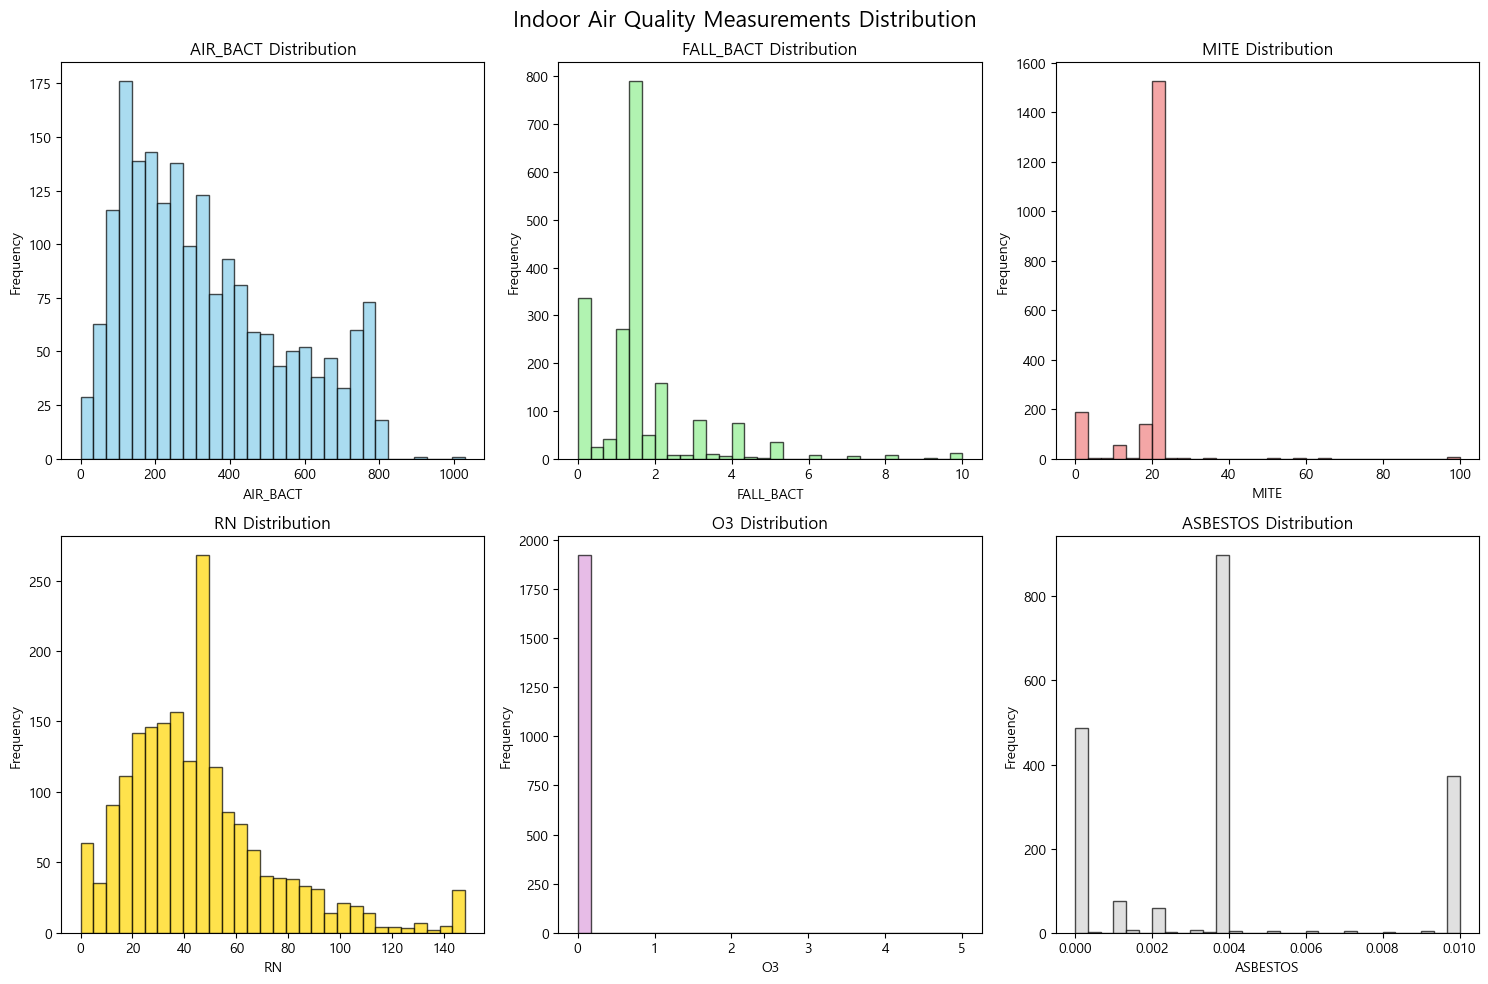

In [9]:
# 1. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Indoor Air Quality Measurements Distribution', fontsize=16)

pollutants = ['AIR_BACT', 'FALL_BACT', 'MITE', 'RN', 'O3', 'ASBESTOS']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum', 'lightgray']

for i, (pollutant, color) in enumerate(zip(pollutants, colors)):
    row, col = i // 3, i % 3
    axes[row, col].hist(df[pollutant], bins=30, color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{pollutant} Distribution')
    axes[row, col].set_xlabel(pollutant)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

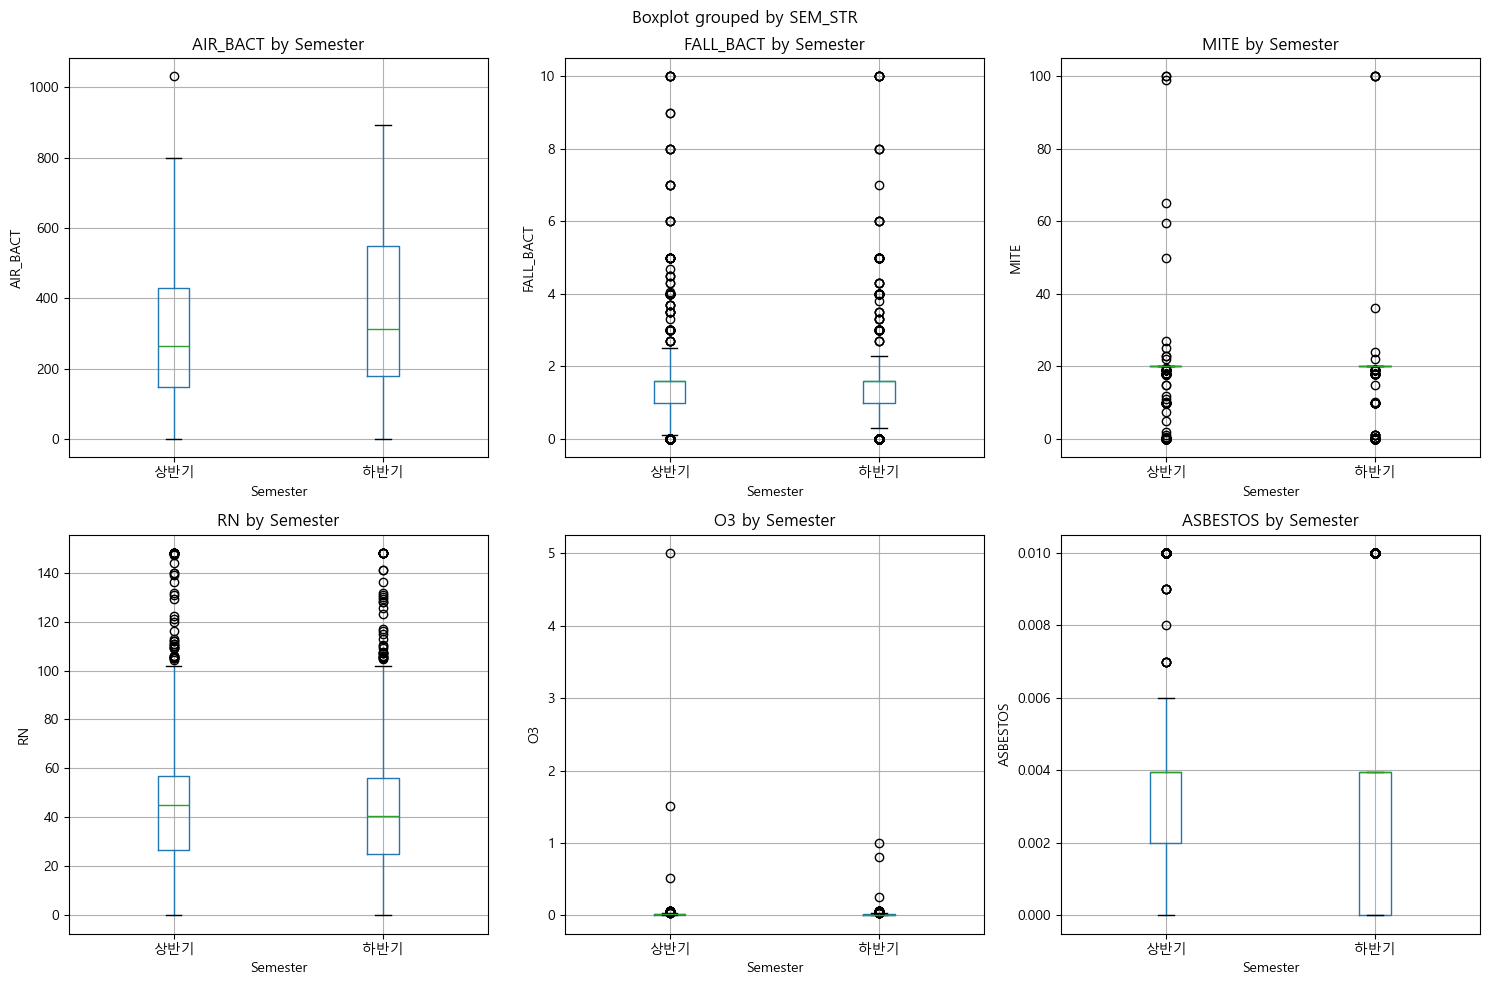

In [10]:
# 2. Î∞ïÏä§ÌîåÎ°ØÏúºÎ°ú Ïò§ÏóºÎ¨ºÏßàÎ≥Ñ Î∂ÑÌè¨ ÎπÑÍµê
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Pollutant Levels by Semester', fontsize=16)

for i, pollutant in enumerate(pollutants):
    row, col = i // 3, i % 3
    df.boxplot(column=pollutant, by='SEM_STR', ax=axes[row, col])
    axes[row, col].set_title(f'{pollutant} by Semester')
    axes[row, col].set_xlabel('Semester')
    axes[row, col].set_ylabel(pollutant)

plt.tight_layout()
plt.show()

In [29]:
df[df['AIR_BACT'] >= 800].sort_values(by='AIR_BACT', ascending=False)

SCHUL_NM    ADRCD_NM  SCHUL_KND_SC_CODE SEM_STR  AIR_BACT  FALL_BACT  \
434    ÏÑúÏö∏Íµ∞ÏûêÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞    1030.5    1.60323   
801    ÏÑúÏö∏Í≤ΩÏàòÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±ÎèôÍµ¨                  2     ÌïòÎ∞òÍ∏∞     893.5    1.60323   
137    ÏÑúÏö∏Î¨∏Ï†ïÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  2     ÌïòÎ∞òÍ∏∞     800.0   10.00000   
350    ÏÑúÏö∏ÎåÄÎ∞©Ï¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞     800.0   10.00000   
182    ÏÑúÏö∏Ïû†Ïã§Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞     800.0    1.60323   
1021  ÏÑúÏö∏Î≥¥ÎùºÎß§Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨                  2     ÌïòÎ∞òÍ∏∞     800.0   10.00000   
1323      ÏÑ∏ÏùºÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞     800.0   10.00000   
1594      Ïû•ÏúÑÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨                  3     ÌïòÎ∞òÍ∏∞     800.0    1.60323   
1712     Í¥ÄÏïÖÍ≥†Îì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  4     ÌïòÎ∞òÍ∏∞     800.0    1.60323   

            MITE          RN     O3  ASBESTOS  
434     0.000000   29.700000  0.011  0.010000  
801    20.000000   32.500000  0.020  0.000000  
137   100.000000  148.000000  0.060  0.010000  
350   100.000000   62.700000  0.060  0.010000  
182    17.980965   45.430749  0.060  0.003965  
1021  100.000000    1.480000  0.060  0.000000  
1323  100.000000  148.000000  0.060  0.003965  
1594  100.000000  148.000000  0.060  0.010000  
1712   17.980965  148.000000  0.060  0.003965

In [30]:
df[df['FALL_BACT'] >= 10].sort_values(by='FALL_BACT', ascending=False)

SCHUL_NM    ADRCD_NM  SCHUL_KND_SC_CODE SEM_STR  AIR_BACT  \
137         ÏÑúÏö∏Î¨∏Ï†ïÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  2     ÌïòÎ∞òÍ∏∞     800.0   
350         ÏÑúÏö∏ÎåÄÎ∞©Ï¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞     800.0   
473         ÏÑúÏö∏ÏïàÌèâÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨                  2     ÌïòÎ∞òÍ∏∞     613.0   
493         ÏÑúÏö∏Ï§ëÎûëÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÎûëÍµ¨                  2     ÌïòÎ∞òÍ∏∞     285.0   
557        ÏÑúÏö∏Ïã†ÏÉÅÎèÑÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨                  2     ÌïòÎ∞òÍ∏∞     398.0   
561         ÏÑúÏö∏Ïã†Ïö∞Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í¥ÄÏïÖÍµ¨                  2     ÌïòÎ∞òÍ∏∞     778.0   
664         ÏÑúÏö∏ÏûêÏö¥Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞     327.0   
1021       ÏÑúÏö∏Î≥¥ÎùºÎß§Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨                  2     ÌïòÎ∞òÍ∏∞     800.0   
1108        ÏÑúÏö∏ÏÑ∏Î™ÖÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞     792.0   
1127  ÏÑúÏö∏ÎåÄÌïôÍµêÏÇ¨Î≤îÎåÄÌïôÎ∂ÄÏÑ§Ï§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞     215.0   
1323           ÏÑ∏ÏùºÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞     800.0   

      FALL_BACT   MITE      RN      O3  ASBESTOS  
137        10.0  100.0  148.00  0.0600  0.010000  
350        10.0  100.0   62.70  0.0600  0.010000  
473        10.0   20.0   42.60  0.0100  0.000000  
493        10.0   20.0   26.40  0.0100  0.010000  
557        10.0   20.0   12.30  0.0000  0.010000  
561        10.0   20.0   22.00  0.0200  0.010000  
664        10.0   20.0   77.00  0.0200  0.003965  
1021       10.0  100.0    1.48  0.0600  0.000000  
1108       10.0    0.0   48.70  0.0150  0.003965  
1127       10.0   20.0   47.20  0.0175  0.003965  
1323       10.0  100.0  148.00  0.0600  0.003965

In [31]:
df[df['MITE'] >= 100].sort_values(by='MITE', ascending=False)

SCHUL_NM    ADRCD_NM  SCHUL_KND_SC_CODE SEM_STR  AIR_BACT  FALL_BACT  \
137    ÏÑúÏö∏Î¨∏Ï†ïÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  2     ÌïòÎ∞òÍ∏∞     800.0   10.00000   
350    ÏÑúÏö∏ÎåÄÎ∞©Ï¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞     800.0   10.00000   
1021  ÏÑúÏö∏Î≥¥ÎùºÎß§Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨                  2     ÌïòÎ∞òÍ∏∞     800.0   10.00000   
1323      ÏÑ∏ÏùºÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞     800.0   10.00000   
1594      Ïû•ÏúÑÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨                  3     ÌïòÎ∞òÍ∏∞     800.0    1.60323   
1776    Ïó¨ÏùòÎèÑÍ≥†Îì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  4     ÌïòÎ∞òÍ∏∞     323.0    1.60323   

       MITE      RN    O3  ASBESTOS  
137   100.0  148.00  0.06  0.010000  
350   100.0   62.70  0.06  0.010000  
1021  100.0    1.48  0.06  0.000000  
1323  100.0  148.00  0.06  0.003965  
1594  100.0  148.00  0.06  0.010000  
1776  100.0   32.20  0.01  0.010000

In [32]:
df[df['RN'] >= 148].sort_values(by='RN', ascending=False)

SCHUL_NM    ADRCD_NM  SCHUL_KND_SC_CODE SEM_STR  AIR_BACT  FALL_BACT  \
137    ÏÑúÏö∏Î¨∏Ï†ïÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  2     ÌïòÎ∞òÍ∏∞    800.00   10.00000   
326    ÏÑúÏö∏Í≥†ÏÇ∞Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    345.60    1.60323   
362   ÏÑúÏö∏ÎèôÍµ¨Î°úÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    326.10    1.00000   
402    ÏÑúÏö∏ÏòÅÎèôÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞    559.20    1.60323   
408    ÏÑúÏö∏ÏòÅÏÑúÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    311.60    2.70000   
430    ÏÑúÏö∏Ï†ïÏã¨Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    428.70    1.60323   
431    ÏÑúÏö∏Ï†ïÏã¨Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  2     ÌïòÎ∞òÍ∏∞    625.00    1.60323   
530    ÏÑúÏö∏ÎåÄÎ¶ºÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    452.00    0.00000   
766    ÏÑúÏö∏Ïó∞ÏùÄÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞     88.00    1.50000   
1017   ÏÑúÏö∏ÏÑúÏã†Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨                  2     ÌïòÎ∞òÍ∏∞    721.00    2.00000   
1124  ÏÑúÏö∏ÏñëÏõêÏà≤Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÎûëÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    347.00    2.00000   
1136      Íµ¨Î£°Ï§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  3     ÌïòÎ∞òÍ∏∞    254.70    0.30000   
1236      Ï≤úÌò∏Ï§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨                  3     ÌïòÎ∞òÍ∏∞    249.50    0.70000   
1289      ÏñëÏ≤úÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞    268.10    1.15000   
1315      ÎåÄÎ¶ºÏ§ëÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  3     ÏÉÅÎ∞òÍ∏∞    125.15    1.60323   
1323      ÏÑ∏ÏùºÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞    800.00   10.00000   
1339      ÏòÅÎ¶ºÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞    498.70    1.60323   
1342      ÏòÅÏÑúÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨                  3     ÌïòÎ∞òÍ∏∞     93.00    2.00000   
1393      ÌúòÍ≤ΩÏ§ëÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨                  3     ÏÉÅÎ∞òÍ∏∞    433.00    4.00000   
1594      Ïû•ÏúÑÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨                  3     ÌïòÎ∞òÍ∏∞    800.00    1.60323   
1596      Ï¢ÖÏïîÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨                  3     ÌïòÎ∞òÍ∏∞    101.00    1.60323   
1624      Íµ¨ÏïîÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í¥ÄÏïÖÍµ¨                  3     ÌïòÎ∞òÍ∏∞    104.00    1.60323   
1679      Ïã†Í∏∏Ï§ëÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  3     ÏÉÅÎ∞òÍ∏∞    383.90    0.00000   
1712     Í¥ÄÏïÖÍ≥†Îì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  4     ÌïòÎ∞òÍ∏∞    800.00    1.60323   
1845     ÎçïÏàòÍ≥†Îì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  4     ÏÉÅÎ∞òÍ∏∞    503.10    1.30000   
1913     Ïû†ÏùºÍ≥†Îì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  4     ÏÉÅÎ∞òÍ∏∞    247.00    3.70000   

            MITE     RN      O3  ASBESTOS  
137   100.000000  148.0  0.0600  0.010000  
326    19.000000  148.0  0.0200  0.002000  
362    20.000000  148.0  0.0200  0.002000  
402    20.000000  148.0  0.0100  0.002000  
408    20.000000  148.0  0.0100  0.002000  
430    20.000000  148.0  0.0100  0.003965  
431    17.980965  148.0  0.0600  0.003965  
530    20.000000  148.0  0.0310  0.010000  
766    20.000000  148.0  0.0100  0.003965  
1017   20.000000  148.0  0.0100  0.003965  
1124   20.000000  148.0  0.0120  0.003965  
1136   20.000000  148.0  0.0000  0.003965  
1236   17.980965  148.0  0.0200  0.003965  
1289   20.000000  148.0  0.0085  0.003965  
1315   20.000000  148.0  0.0150  0.002000  
1323  100.000000  148.0  0.0600  0.003965  
1339   20.000000  148.0  0.0300  0.000000  
1342   20.000000  148.0  0.0100  0.000000  
1393   20.000000  148.0  0.0300  0.003965  
1594  100.000000  148.0  0.0600  0.010000  
1596   20.000000  148.0  0.0150

In [33]:
df[df['O3'] >= 0.06].sort_values(by='O3', ascending=False)

SCHUL_NM    ADRCD_NM  SCHUL_KND_SC_CODE SEM_STR  AIR_BACT  \
1137         ÏïïÍµ¨Ï†ïÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  3     ÏÉÅÎ∞òÍ∏∞    135.50   
674        ÏÑúÏö∏Ï∞ΩÍ≤ΩÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞     70.00   
1664         ÏúÑÎ°ÄÏÜîÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  3     ÌïòÎ∞òÍ∏∞      3.00   
1760         ÏÑùÍ¥ÄÍ≥†Îì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨                  4     ÌïòÎ∞òÍ∏∞    271.00   
1851  ÏÑúÏö∏ÏõπÌà∞Ïï†ÎãàÎ©îÏù¥ÏÖòÍ≥†Îì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨                  4     ÏÉÅÎ∞òÍ∏∞    318.00   
933        ÏÑúÏö∏Í∏àÏñëÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨                  2     ÌïòÎ∞òÍ∏∞    572.00   
137        ÏÑúÏö∏Î¨∏Ï†ïÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  2     ÌïòÎ∞òÍ∏∞    800.00   
182        ÏÑúÏö∏Ïû†Ïã§Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    800.00   
313        ÏÑúÏö∏ÏπòÌòÑÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨                  2     ÌïòÎ∞òÍ∏∞    626.20   
499        ÏÑúÏö∏Ï§ëÌù•Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÎûëÍµ¨                  2     ÌïòÎ∞òÍ∏∞    377.10   
431        ÏÑúÏö∏Ï†ïÏã¨Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  2     ÌïòÎ∞òÍ∏∞    625.00   
752        ÏÑúÏö∏Ïã†ÏÇ¨Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    378.20   
1009       ÏÑúÏö∏Í∞ÄÏù∏Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨                  2     ÌïòÎ∞òÍ∏∞    333.00   
416        ÏÑúÏö∏ÏòÅÏ§ëÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞    420.35   
418       ÏÑúÏö∏Ïò§Î•òÎÇ®Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    361.20   
329        ÏÑúÏö∏Í≥†Ï≤ôÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨                  2     ÌïòÎ∞òÍ∏∞    360.70   
350        ÏÑúÏö∏ÎåÄÎ∞©Ï¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞    800.00   
1070       ÏÑúÏö∏Îì±ÎßàÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    225.00   
1041       ÏÑúÏö∏ÏÉÅÏßÄÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨                  2     ÌïòÎ∞òÍ∏∞    749.70   
1026       ÏÑúÏö∏Ï°∞ÏõêÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í¥ÄÏïÖÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    227.00   
1021      ÏÑúÏö∏Î≥¥ÎùºÎß§Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨                  2     ÌïòÎ∞òÍ∏∞    800.00   
1323          ÏÑ∏ÏùºÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞    800.00   
1116      ÏÑúÏö∏Í∏àÎÇòÎûòÏ¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    360.10   
1122      ÏÑúÏö∏Ìï¥ÎàÑÎ¶¨Ï¥àÎì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  2     ÏÉÅÎ∞òÍ∏∞    476.00   
1309          ÎÇúÍ≥°Ï§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨                  3     ÏÉÅÎ∞òÍ∏∞    336.70   
1594          Ïû•ÏúÑÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨                  3     ÌïòÎ∞òÍ∏∞    800.00   
1533          Ïó∞Ìù¨Ï§ëÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÎåÄÎ¨∏Íµ¨                  3     ÏÉÅÎ∞òÍ∏∞    668.00   
1340          ÏòÅÎ¶ºÏ§ëÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨                  3     ÌïòÎ∞òÍ∏∞    178.10   
1711         Í¥ÄÏïÖÍ≥†Îì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  4     ÏÉÅÎ∞òÍ∏∞    640.00   
1712         Í¥ÄÏïÖÍ≥†Îì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨                  4     ÌïòÎ∞òÍ∏∞    800.00   
1830   ÏÑúÏö∏ÎèÑÏãúÍ≥ºÌïôÍ∏∞Ïà†Í≥†Îì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨                  4     ÌïòÎ∞òÍ∏∞     71.00   
1845         ÎçïÏàòÍ≥†Îì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  4     ÏÉÅÎ∞òÍ∏∞    503.10   
1914         Ïû†ÏùºÍ≥†Îì±ÌïôÍµê   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨                  4     ÌïòÎ∞òÍ∏∞    437.40   

      FALL_BACT        MITE          RN     O3  ASBESTOS  
1137    0.20000    0.200000   16.400000  5.003  0.010000  
674     7.00000   20.000000    1.000000  1.505  0.010000  
1664    0.00000    1.000000    1.000000  1.000  0.000000  
1760    0.00000   20.000000   54.000000  0.800  0.000000  
1851    1.60323   17.980965   45.43

In [34]:
df[df['ASBESTOS'] >= 0.01].sort_values(by='ASBESTOS', ascending=False)

SCHUL_NM   ADRCD_NM  SCHUL_KND_SC_CODE SEM_STR  AIR_BACT  FALL_BACT  \
1880    Ìö®Î¨∏Í≥†Îì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨                  4     ÌïòÎ∞òÍ∏∞     229.0    1.60323   
6     ÏÑúÏö∏ÎÖºÌòÑÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞     424.5    0.00000   
7     ÏÑúÏö∏ÎÖºÌòÑÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÌïòÎ∞òÍ∏∞     228.0    1.60323   
8     ÏÑúÏö∏ÎåÄÍ≥°Ï¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞     298.0    1.60323   
1772    ÏñëÏû¨Í≥†Îì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨                  4     ÌïòÎ∞òÍ∏∞     612.0    1.60323   
...        ...        ...                ...     ...       ...        ...   
25    ÏÑúÏö∏ÎèÑÍ≥°Ï¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÌïòÎ∞òÍ∏∞     527.0    1.60323   
21    ÏÑúÏö∏ÎåÄÏπòÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÌïòÎ∞òÍ∏∞     274.0    0.00000   
17    ÏÑúÏö∏ÎåÄÏßÑÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÌïòÎ∞òÍ∏∞     271.0    1.60323   
16    ÏÑúÏö∏ÎåÄÏßÑÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÏÉÅÎ∞òÍ∏∞     763.0    0.00000   
11    ÏÑúÏö∏ÎåÄÎèÑÏ¥àÎì±ÌïôÍµê  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨                  2     ÌïòÎ∞òÍ∏∞     785.0    0.00000   

      MITE    RN      O3  ASBESTOS  
1880  20.0  73.0  0.0300      0.01  
6     20.0  29.0  0.0145      0.01  
7     20.0  32.1  0.0100      0.01  
8      0.0  35.8  0.0120      0.01  
1772  20.0  36.1  0.0100      0.01  
...    ...   ...     ...       ...  
25    20.0  62.8  0.0000      0.01  
21     0.0  46.0  0.0100      0.01  
17    10.0  45.3  0.0100      0.01  
16    20.0  24.7  0.0290      0.01  
11    20.0  34.7  0.0200      0.01  

[372 rows x 10 columns]

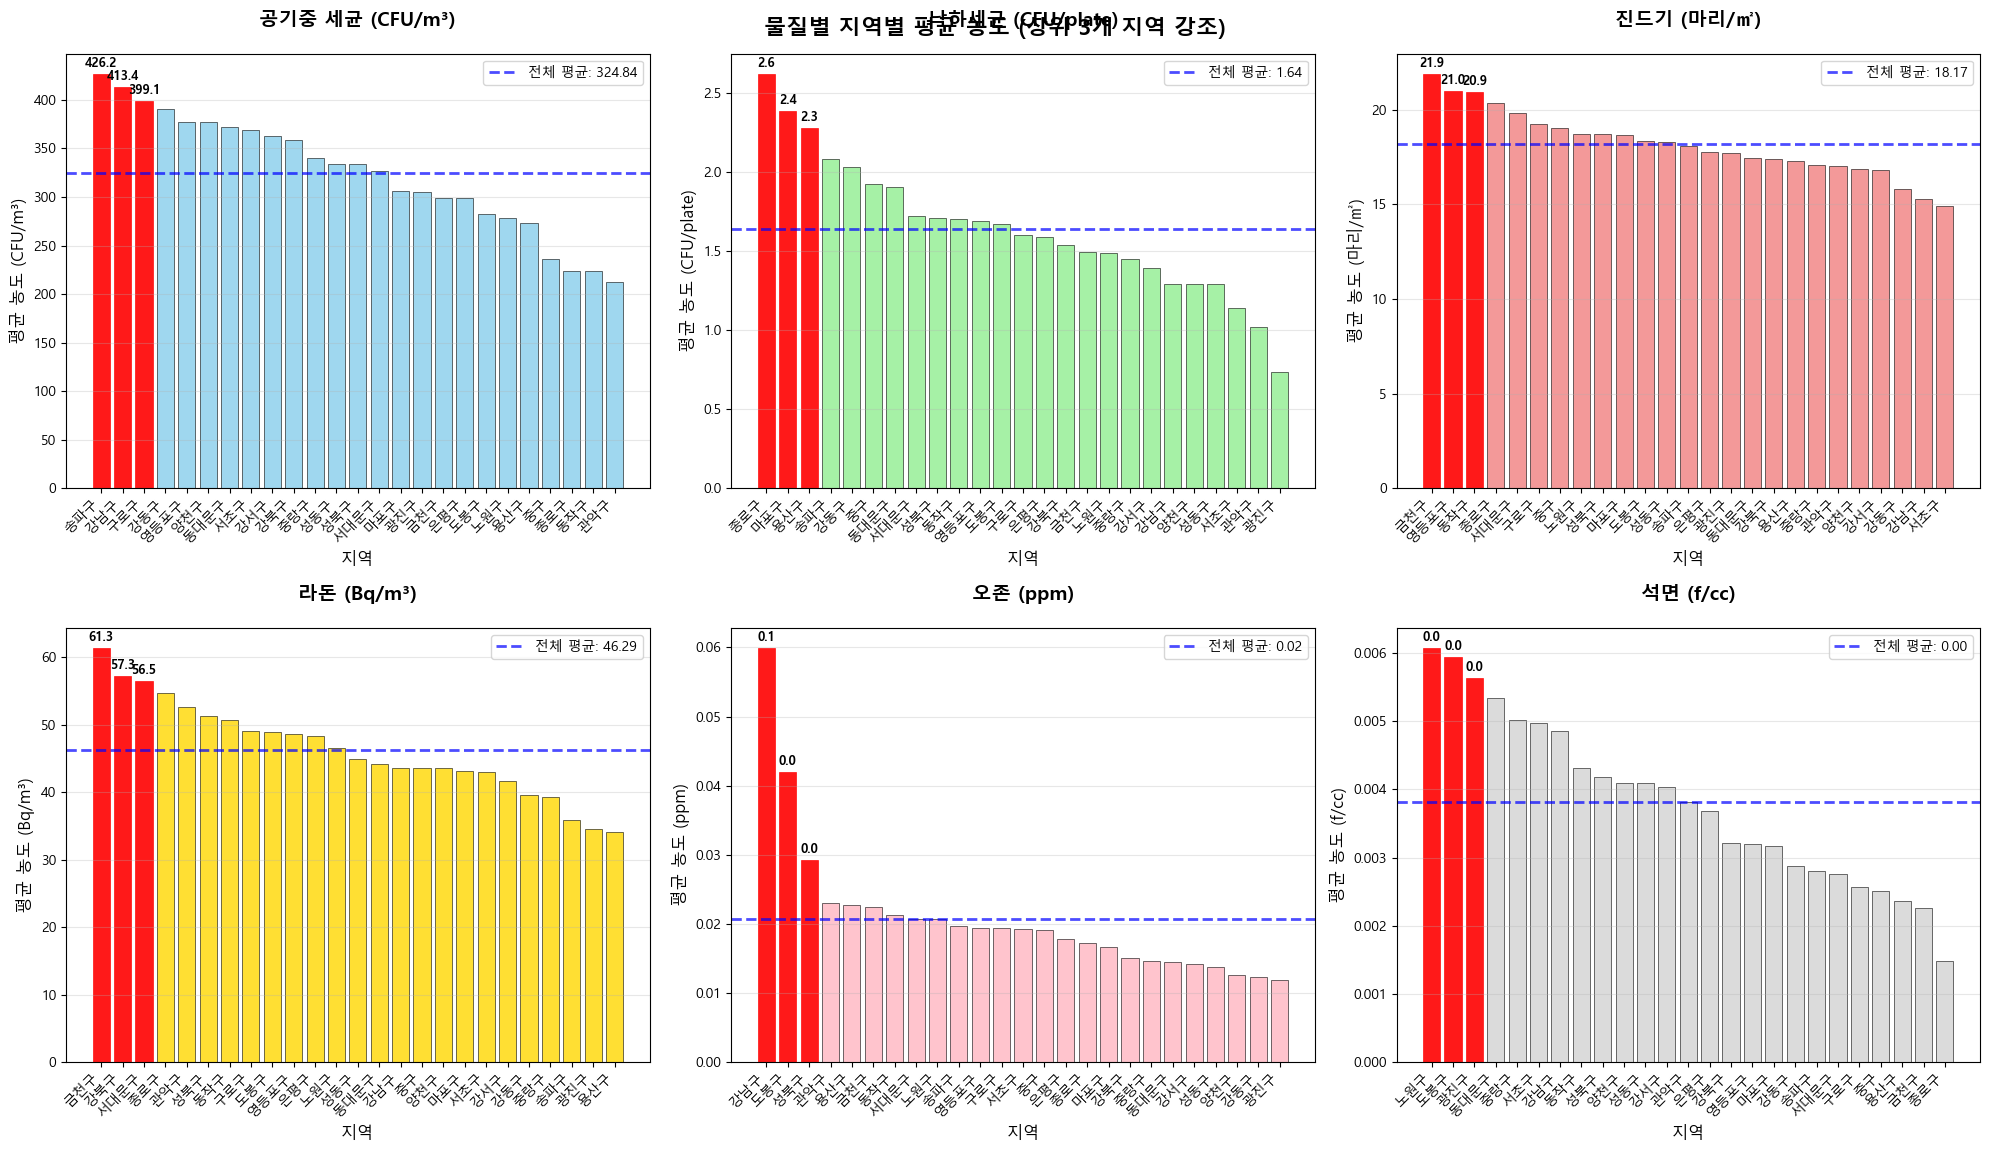

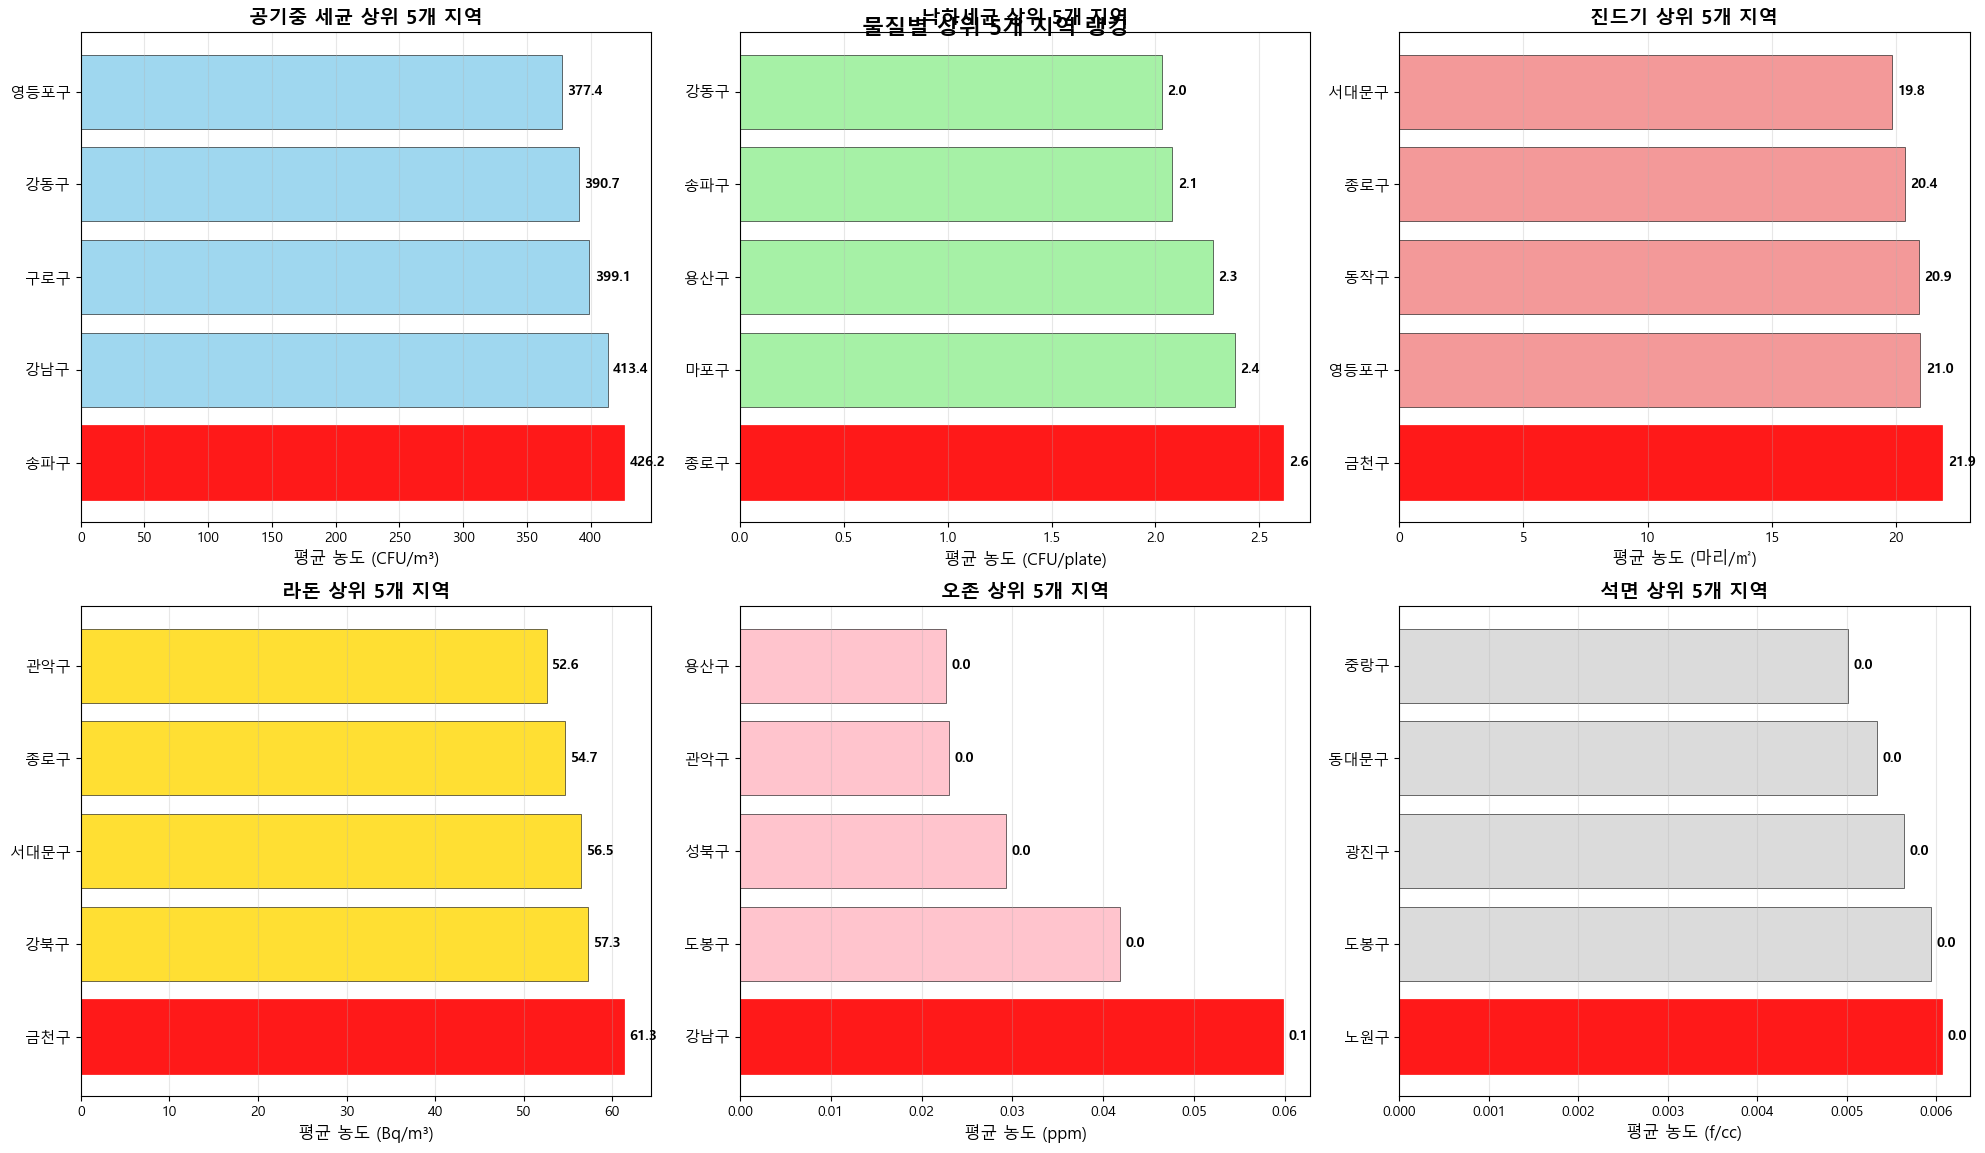

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv('data_merged.csv')

# Î¨ºÏßàÎ≥Ñ Ï†ïÎ≥¥
substances_info = {
    'AIR_BACT': {'name': 'Í≥µÍ∏∞Ï§ë ÏÑ∏Í∑†', 'unit': 'CFU/m¬≥', 'color': 'skyblue'},
    'FALL_BACT': {'name': 'ÎÇôÌïòÏÑ∏Í∑†', 'unit': 'CFU/plate', 'color': 'lightgreen'},
    'MITE': {'name': 'ÏßÑÎìúÍ∏∞', 'unit': 'ÎßàÎ¶¨/„é°', 'color': 'lightcoral'},
    'RN': {'name': 'ÎùºÎèà', 'unit': 'Bq/m¬≥', 'color': 'gold'},
    'O3': {'name': 'Ïò§Ï°¥', 'unit': 'ppm', 'color': 'lightpink'},
    'ASBESTOS': {'name': 'ÏÑùÎ©¥', 'unit': 'f/cc', 'color': 'lightgray'}
}

# ÏßÄÏó≠Î™Ö Îã®Ï∂ï
df['ÏßÄÏó≠'] = df['ADRCD_NM'].str.replace('ÏÑúÏö∏ÌäπÎ≥ÑÏãú ', '')

# Î¨ºÏßàÎ≥Ñ ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
regional_averages = {}
for substance in substances_info.keys():
    regional_avg = df.groupby('ÏßÄÏó≠')[substance].mean().sort_values(ascending=False)
    regional_averages[substance] = regional_avg

# 1. Í∞úÎ≥Ñ Î¨ºÏßàÎ≥Ñ ÎßâÎåÄÍ∑∏ÎûòÌîÑ (6Í∞ú ÏÑúÎ∏åÌîåÎ°Ø)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (substance, info) in enumerate(substances_info.items()):
    ax = axes[idx]
    data = regional_averages[substance]
    
    bars = ax.bar(range(len(data)), data.values, color=info['color'], alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # ÏÉÅÏúÑ 3Í∞ú ÏßÄÏó≠ Í∞ïÏ°∞
    for i in range(min(3, len(bars))):
        bars[i].set_color('red')
        bars[i].set_alpha(0.9)
    
    ax.set_title(f'{info["name"]} ({info["unit"]})', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel(f'ÌèâÍ∑† ÎÜçÎèÑ ({info["unit"]})', fontsize=12)
    ax.set_xlabel('ÏßÄÏó≠', fontsize=12)
    
    # xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.index, rotation=45, ha='right', fontsize=10)
    
    # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
    ax.grid(True, axis='y', alpha=0.3)
    
    # ÌèâÍ∑†ÏÑ† Ï∂îÍ∞Ä
    avg_value = data.mean()
    ax.axhline(y=avg_value, color='blue', linestyle='--', alpha=0.7, linewidth=2, label=f'Ï†ÑÏ≤¥ ÌèâÍ∑†: {avg_value:.2f}')
    ax.legend(fontsize=10)
    
    # ÏÉÅÏúÑ 3Í∞ú ÏßÄÏó≠Ïóê Í∞í ÌëúÏãú
    for i in range(min(3, len(data))):
        ax.text(i, data.iloc[i] + data.max()*0.01, f'{data.iloc[i]:.1f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('Î¨ºÏßàÎ≥Ñ ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† ÎÜçÎèÑ (ÏÉÅÏúÑ 3Í∞ú ÏßÄÏó≠ Í∞ïÏ°∞)', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# 2. Î¨ºÏßàÎ≥Ñ ÏÉÅÏúÑ 5Í∞ú ÏßÄÏó≠ ÎπÑÍµê (Í∞ÄÎ°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (substance, info) in enumerate(substances_info.items()):
    ax = axes[idx]
    data = regional_averages[substance].head(5)
    
    bars = ax.barh(range(len(data)), data.values, color=info['color'], alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # 1ÏúÑ ÏßÄÏó≠ Í∞ïÏ°∞
    bars[0].set_color('red')
    bars[0].set_alpha(0.9)
    
    ax.set_title(f'{info["name"]} ÏÉÅÏúÑ 5Í∞ú ÏßÄÏó≠', fontsize=14, fontweight='bold')
    ax.set_xlabel(f'ÌèâÍ∑† ÎÜçÎèÑ ({info["unit"]})', fontsize=12)
    
    # yÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï (Ïó≠ÏàúÏúºÎ°ú ÌëúÏãú)
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data.index, fontsize=11)
    
    # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
    ax.grid(True, axis='x', alpha=0.3)
    
    # Í∞í ÌëúÏãú
    for i, (region, value) in enumerate(data.items()):
        ax.text(value + data.max()*0.01, i, f'{value:.1f}', 
                ha='left', va='center', fontweight='bold', fontsize=10)

plt.suptitle('Î¨ºÏßàÎ≥Ñ ÏÉÅÏúÑ 5Í∞ú ÏßÄÏó≠ Îû≠ÌÇπ', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

=== Í≥†ÎÜçÎèÑ Ïò§Ïóº Í∏∞Ï§Ä ===
Í≥µÍ∏∞Ï§ë ÏÑ∏Í∑†: >= 800
ÎÇôÌïòÏÑ∏Í∑†: >= 10
ÏßÑÎìúÍ∏∞: >= 100
ÎùºÎèà: >= 148
Ïò§Ï°¥: >= 0.06
ÏÑùÎ©¥: >= 0.01

=== Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ ÌòÑÌô© ===
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò: 1932
Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Ïàò: 421
Í≥†ÎÜçÎèÑ ÎπÑÏú®: 21.79%

=== ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ===
 1. ÎÖ∏ÏõêÍµ¨: 64Í±¥
 2. Í∞ïÎÇ®Íµ¨: 38Í±¥
 3. ÎèÑÎ¥âÍµ¨: 38Í±¥
 4. Í¥ëÏßÑÍµ¨: 26Í±¥
 5. ÏÑúÏ¥àÍµ¨: 25Í±¥
 6. ÎèôÎåÄÎ¨∏Íµ¨: 24Í±¥
 7. Ï§ëÎûëÍµ¨: 24Í±¥
 8. ÏñëÏ≤úÍµ¨: 20Í±¥
 9. Í∞ïÏÑúÍµ¨: 19Í±¥
10. ÏÑ±Î∂ÅÍµ¨: 19Í±¥
11. ÏòÅÎì±Ìè¨Íµ¨: 16Í±¥
12. ÏÜ°ÌååÍµ¨: 14Í±¥
13. ÎèôÏûëÍµ¨: 14Í±¥
14. ÏÑ±ÎèôÍµ¨: 13Í±¥
15. Í¥ÄÏïÖÍµ¨: 13Í±¥
16. Íµ¨Î°úÍµ¨: 10Í±¥
17. ÎßàÌè¨Íµ¨: 9Í±¥
18. ÏùÄÌèâÍµ¨: 9Í±¥
19. Í∏àÏ≤úÍµ¨: 7Í±¥
20. ÏÑúÎåÄÎ¨∏Íµ¨: 6Í±¥
21. Ïö©ÏÇ∞Íµ¨: 6Í±¥
22. Í∞ïÎ∂ÅÍµ¨: 4Í±¥
23. Í∞ïÎèôÍµ¨: 2Í±¥
24. Ï§ëÍµ¨: 1Í±¥


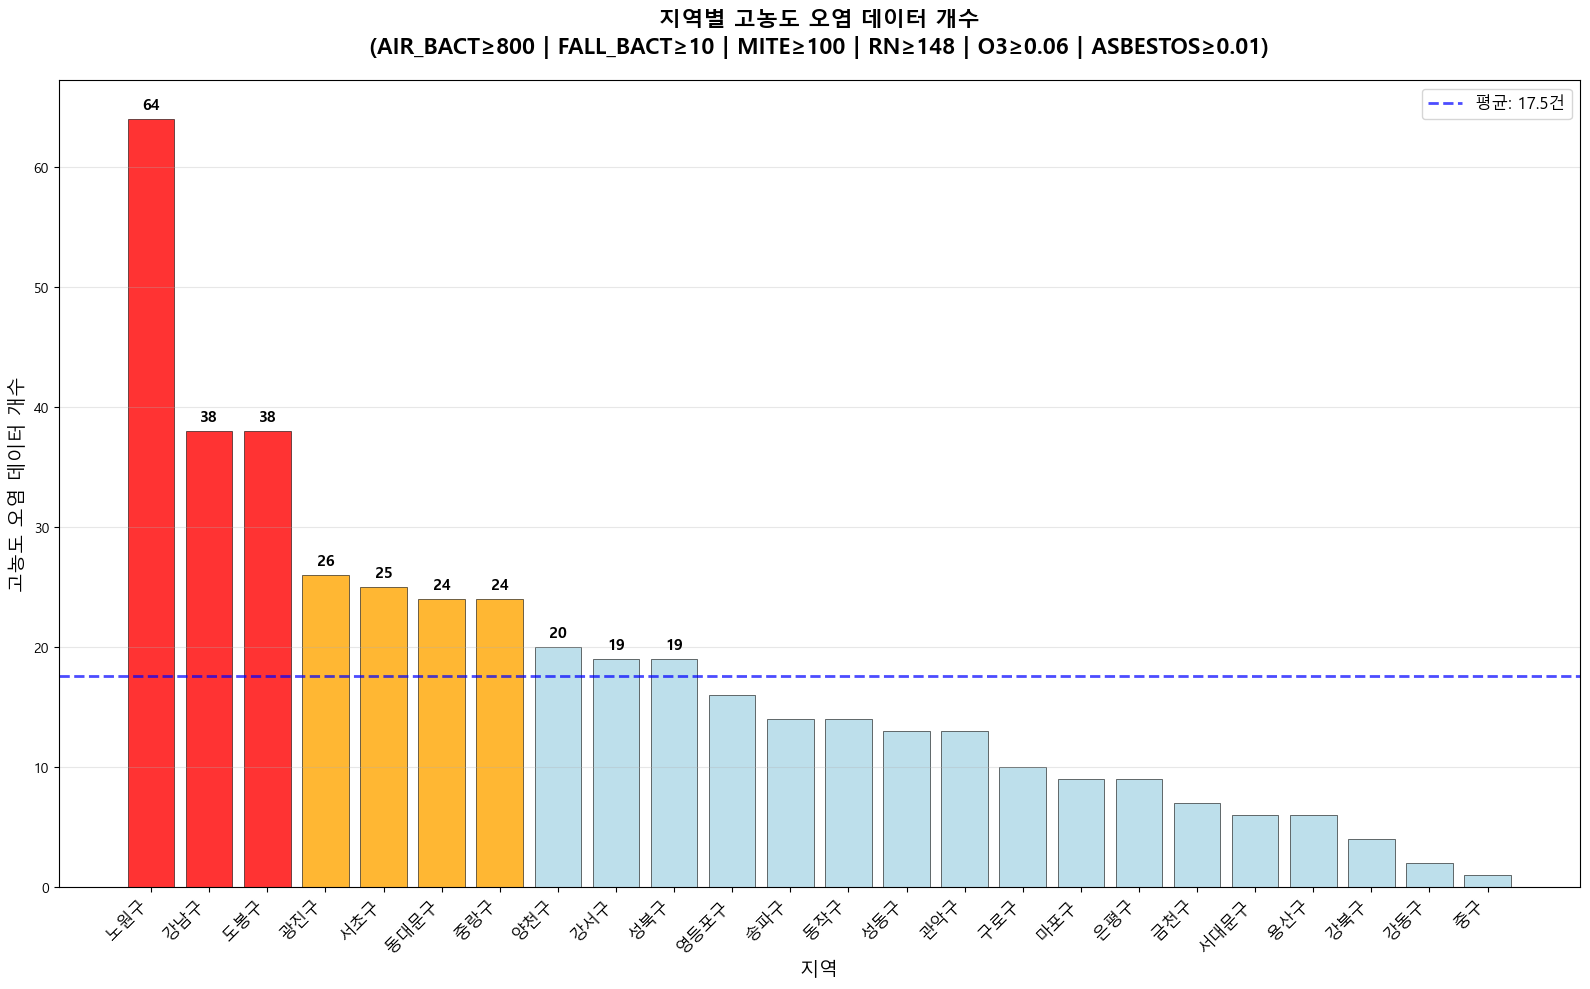


=== Î¨ºÏßàÎ≥Ñ Í≥†ÎÜçÎèÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ===
ÏÑùÎ©¥: 372Í±¥
Ïò§Ï°¥: 33Í±¥
ÎùºÎèà: 26Í±¥
ÎÇôÌïòÏÑ∏Í∑†: 11Í±¥
Í≥µÍ∏∞Ï§ë ÏÑ∏Í∑†: 9Í±¥
ÏßÑÎìúÍ∏∞: 6Í±¥


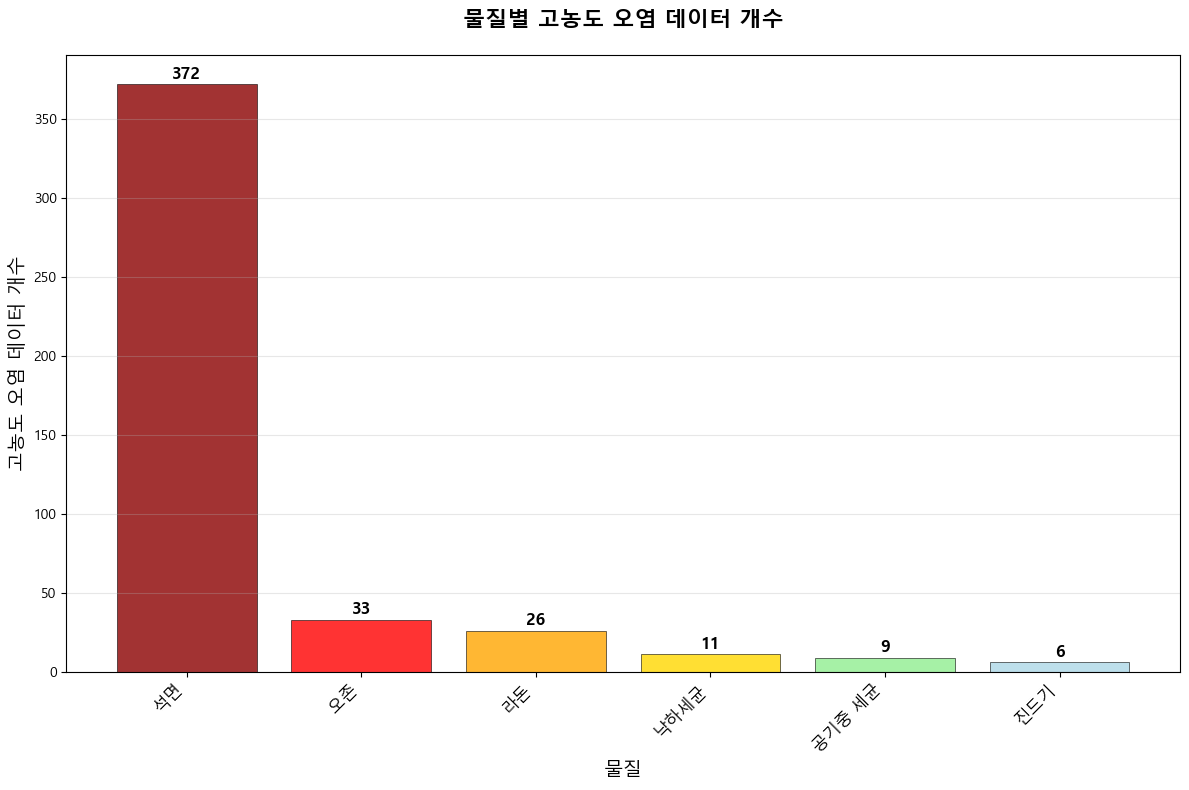

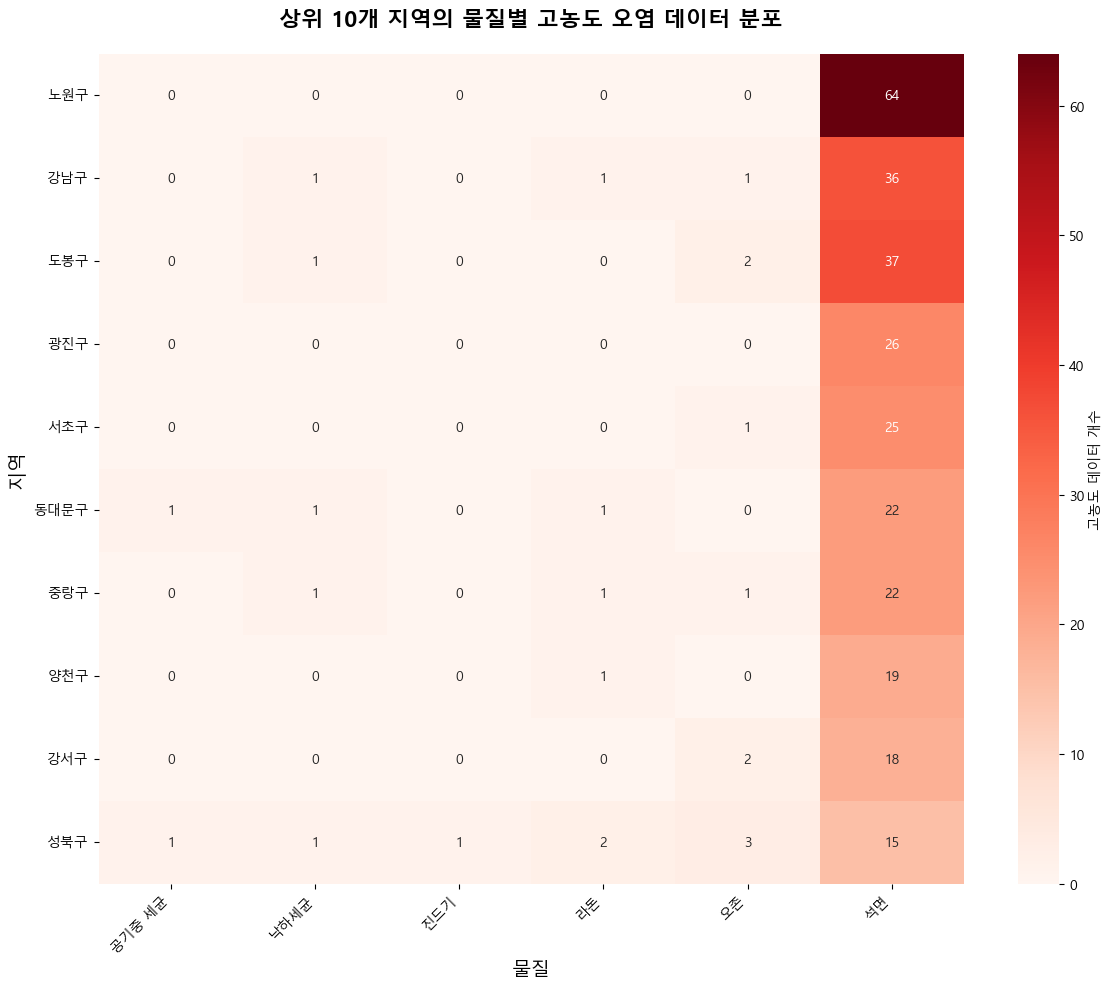

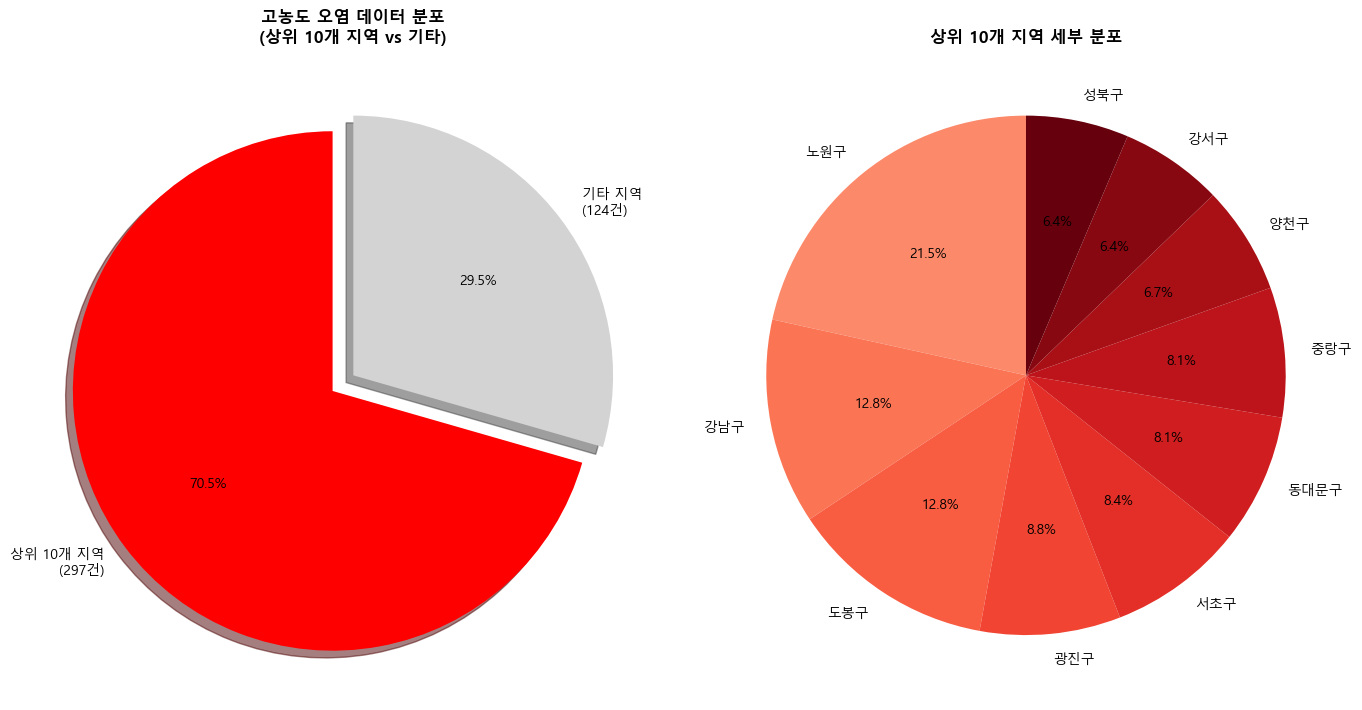


=== ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº ÎπÑÏú® (ÏÉÅÏúÑ 10Í∞ú) ===
 1. ÎèÑÎ¥âÍµ¨: 50.0% (38/76)
 2. ÎÖ∏ÏõêÍµ¨: 49.2% (64/130)
 3. Í¥ëÏßÑÍµ¨: 43.3% (26/60)
 4. ÎèôÎåÄÎ¨∏Íµ¨: 40.0% (24/60)
 5. Í∞ïÎÇ®Íµ¨: 34.2% (38/111)
 6. Ï§ëÎûëÍµ¨: 30.8% (24/78)
 7. ÏÑúÏ¥àÍµ¨: 30.5% (25/82)
 8. ÏÑ±Î∂ÅÍµ¨: 25.0% (19/76)
 9. ÏñëÏ≤úÍµ¨: 20.0% (20/100)
10. ÎèôÏûëÍµ¨: 19.4% (14/72)


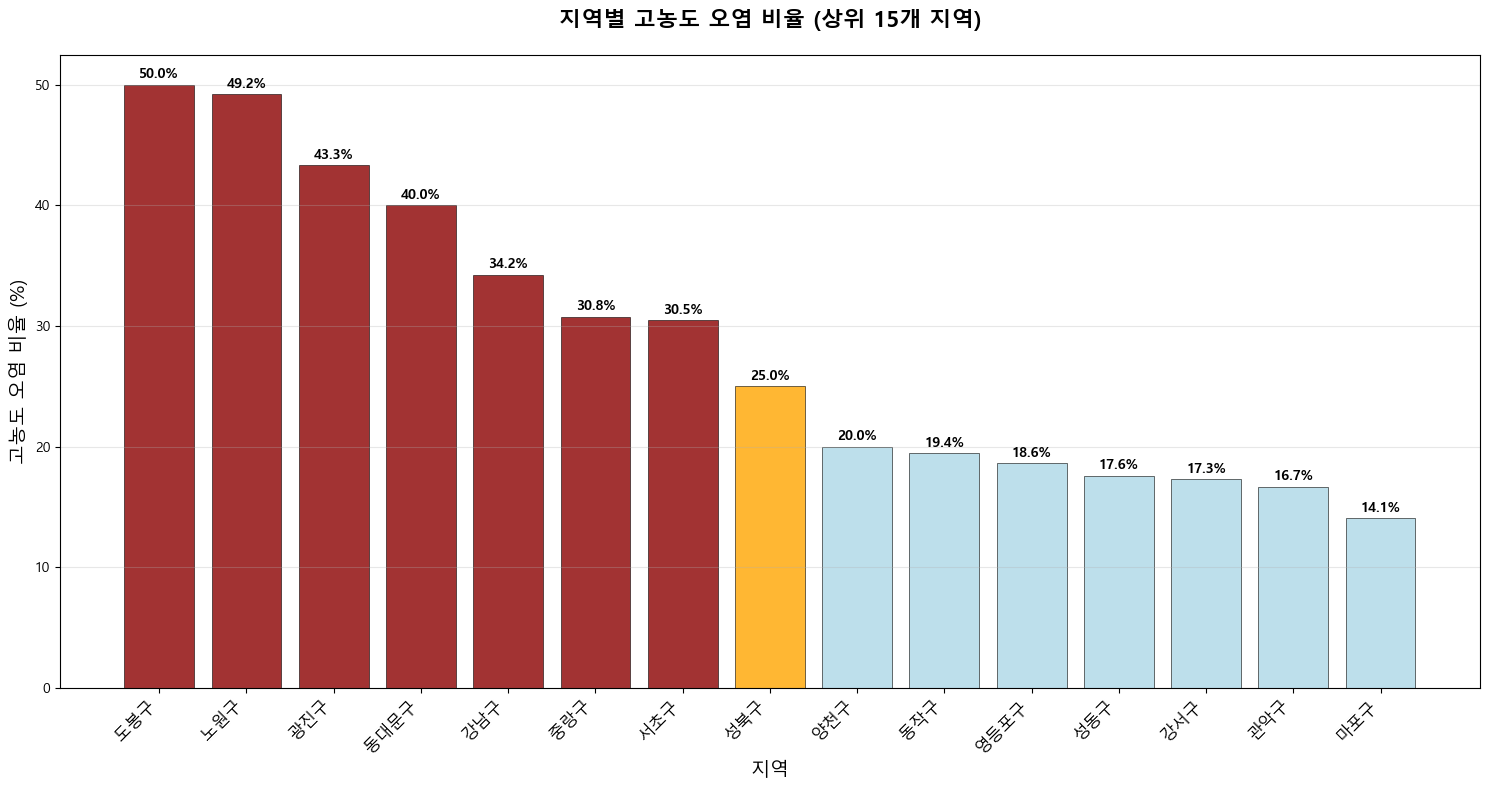


=== ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥º ===
üèÜ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ ÏµúÎã§ ÏßÄÏó≠: ÎÖ∏ÏõêÍµ¨ (64Í±¥)
üìä Í≥†ÎÜçÎèÑ Ïò§Ïóº ÎπÑÏú® ÏµúÍ≥† ÏßÄÏó≠: ÎèÑÎ¥âÍµ¨ (50.0%)
‚ö†Ô∏è  Í∞ÄÏû• Î¨∏Ï†úÍ∞Ä ÎêòÎäî Î¨ºÏßà: ÏÑùÎ©¥ (372Í±¥)
üìà Ï†ÑÏ≤¥ Í≥†ÎÜçÎèÑ Ïò§Ïóº ÎπÑÏú®: 21.8%


In [38]:
# Í≥†ÎÜçÎèÑ Ïò§Ïóº Í∏∞Ï§Ä Ï†ïÏùò
high_pollution_criteria = {
    'AIR_BACT': 800,
    'FALL_BACT': 10,
    'MITE': 100,
    'RN': 148,
    'O3': 0.06,
    'ASBESTOS': 0.01
}

# Î¨ºÏßàÎ™Ö Îß§Ìïë
substance_names = {
    'AIR_BACT': 'Í≥µÍ∏∞Ï§ë ÏÑ∏Í∑†',
    'FALL_BACT': 'ÎÇôÌïòÏÑ∏Í∑†',
    'MITE': 'ÏßÑÎìúÍ∏∞',
    'RN': 'ÎùºÎèà',
    'O3': 'Ïò§Ï°¥',
    'ASBESTOS': 'ÏÑùÎ©¥'
}

print("=== Í≥†ÎÜçÎèÑ Ïò§Ïóº Í∏∞Ï§Ä ===")
for substance, threshold in high_pollution_criteria.items():
    print(f"{substance_names[substance]}: >= {threshold}")

# ÏßÄÏó≠Î™Ö Îã®Ï∂ï
df['ÏßÄÏó≠'] = df['ADRCD_NM'].str.replace('ÏÑúÏö∏ÌäπÎ≥ÑÏãú ', '')

# Í≥†ÎÜçÎèÑ Ïò§Ïóº Ï°∞Í±¥Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
high_pollution_mask = (
    (df['AIR_BACT'] >= 800) |
    (df['FALL_BACT'] >= 10) |
    (df['MITE'] >= 100) |
    (df['RN'] >= 148) |
    (df['O3'] >= 0.06) |
    (df['ASBESTOS'] >= 0.01)
)

high_pollution_df = df[high_pollution_mask].copy()

print(f"\n=== Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ ÌòÑÌô© ===")
print(f"Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Ïàò: {len(high_pollution_df)}")
print(f"Í≥†ÎÜçÎèÑ ÎπÑÏú®: {len(high_pollution_df)/len(df)*100:.2f}%")

# ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
regional_high_pollution = high_pollution_df['ÏßÄÏó≠'].value_counts().sort_values(ascending=False)
print(f"\n=== ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ===")
for i, (region, count) in enumerate(regional_high_pollution.items(), 1):
    print(f"{i:2d}. {region}: {count}Í±¥")

# 1. ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(16, 10))

# Î©îÏù∏ ÎßâÎåÄÍ∑∏ÎûòÌîÑ
bars = plt.bar(range(len(regional_high_pollution)), regional_high_pollution.values, 
               color=['red' if i < 3 else 'orange' if i < 7 else 'lightblue' 
                      for i in range(len(regional_high_pollution))],
               alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò\n(AIR_BACT‚â•800 | FALL_BACT‚â•10 | MITE‚â•100 | RN‚â•148 | O3‚â•0.06 | ASBESTOS‚â•0.01)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ÏßÄÏó≠', fontsize=14)
plt.ylabel('Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò', fontsize=14)

# xÏ∂ï Î†àÏù¥Î∏î
plt.xticks(range(len(regional_high_pollution)), regional_high_pollution.index, 
           rotation=45, ha='right', fontsize=12)

# ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠Ïóê Í∞í ÌëúÏãú
for i in range(min(10, len(bars))):
    height = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# ÌèâÍ∑†ÏÑ† Ï∂îÍ∞Ä
avg_value = regional_high_pollution.mean()
plt.axhline(y=avg_value, color='blue', linestyle='--', alpha=0.7, linewidth=2,
            label=f'ÌèâÍ∑†: {avg_value:.1f}Í±¥')

plt.legend(fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Î¨ºÏßàÎ≥Ñ Í≥†ÎÜçÎèÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Î∂ÑÏÑù
substance_high_counts = {}
for substance, threshold in high_pollution_criteria.items():
    count = len(df[df[substance] >= threshold])
    substance_high_counts[substance_names[substance]] = count

substance_counts_df = pd.DataFrame(list(substance_high_counts.items()), 
                                   columns=['Î¨ºÏßà', 'Í≥†ÎÜçÎèÑ_Îç∞Ïù¥ÌÑ∞Ïàò'])
substance_counts_df = substance_counts_df.sort_values('Í≥†ÎÜçÎèÑ_Îç∞Ïù¥ÌÑ∞Ïàò', ascending=False)

print(f"\n=== Î¨ºÏßàÎ≥Ñ Í≥†ÎÜçÎèÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ===")
for _, row in substance_counts_df.iterrows():
    print(f"{row['Î¨ºÏßà']}: {row['Í≥†ÎÜçÎèÑ_Îç∞Ïù¥ÌÑ∞Ïàò']}Í±¥")

# 3. Î¨ºÏßàÎ≥Ñ Í≥†ÎÜçÎèÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 8))
colors = ['darkred', 'red', 'orange', 'gold', 'lightgreen', 'lightblue']
bars = plt.bar(substance_counts_df['Î¨ºÏßà'], substance_counts_df['Í≥†ÎÜçÎèÑ_Îç∞Ïù¥ÌÑ∞Ïàò'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('Î¨ºÏßàÎ≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Î¨ºÏßà', fontsize=14)
plt.ylabel('Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Í∞í ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠Ïùò Î¨ºÏßàÎ≥Ñ ÏÑ∏Î∂Ä Î∂ÑÏÑù
top_10_regions = regional_high_pollution.head(10).index

# ÏßÄÏó≠Î≥Ñ Î¨ºÏßàÎ≥Ñ Í≥†ÎÜçÎèÑ Îç∞Ïù¥ÌÑ∞ Îß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ±
region_substance_matrix = pd.DataFrame(index=top_10_regions, 
                                       columns=list(substance_names.values()))

for region in top_10_regions:
    region_data = high_pollution_df[high_pollution_df['ÏßÄÏó≠'] == region]
    for substance, threshold in high_pollution_criteria.items():
        count = len(region_data[region_data[substance] >= threshold])
        region_substance_matrix.loc[region, substance_names[substance]] = count

region_substance_matrix = region_substance_matrix.fillna(0).astype(int)

# 5. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(region_substance_matrix, annot=True, cmap='Reds', fmt='d', 
            cbar_kws={'label': 'Í≥†ÎÜçÎèÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò'})
plt.title('ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠Ïùò Î¨ºÏßàÎ≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Î¨ºÏßà', fontsize=14)
plt.ylabel('ÏßÄÏó≠', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. ÌååÏù¥Ï∞®Ìä∏: ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠ vs Í∏∞ÌÉÄ
top_10_sum = regional_high_pollution.head(10).sum()
others_sum = regional_high_pollution.tail(len(regional_high_pollution)-10).sum()

plt.figure(figsize=(14, 7))

# ÏôºÏ™Ω: Ï†ÑÏ≤¥ ÎπÑÏú®
plt.subplot(1, 2, 1)
sizes = [top_10_sum, others_sum]
labels = [f'ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠\n({top_10_sum}Í±¥)', f'Í∏∞ÌÉÄ ÏßÄÏó≠\n({others_sum}Í±¥)']
colors = ['red', 'lightgray']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        explode=explode, shadow=True, startangle=90)
plt.title('Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨\n(ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠ vs Í∏∞ÌÉÄ)', fontweight='bold')

# Ïò§Î•∏Ï™Ω: ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠ ÏÑ∏Î∂Ä
plt.subplot(1, 2, 2)
top_10_data = regional_high_pollution.head(10)
colors_detailed = plt.cm.Reds(np.linspace(0.4, 1, 10))

plt.pie(top_10_data.values, labels=top_10_data.index, autopct='%1.1f%%',
        colors=colors_detailed, startangle=90)
plt.title('ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠ ÏÑ∏Î∂Ä Î∂ÑÌè¨', fontweight='bold')

plt.tight_layout()
plt.show()

# 7. ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ ÎπÑÏú® Î∂ÑÏÑù (Í∞Å ÏßÄÏó≠Ïùò Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÎåÄÎπÑ)
regional_total = df['ÏßÄÏó≠'].value_counts()
regional_high_ratio = (regional_high_pollution / regional_total * 100).sort_values(ascending=False)

print(f"\n=== ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº ÎπÑÏú® (ÏÉÅÏúÑ 10Í∞ú) ===")
for i, (region, ratio) in enumerate(regional_high_ratio.head(10).items(), 1):
    total_count = regional_total[region]
    high_count = regional_high_pollution.get(region, 0)
    print(f"{i:2d}. {region}: {ratio:.1f}% ({high_count}/{total_count})")

# 8. Í≥†ÎÜçÎèÑ ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(15, 8))
top_15_ratio = regional_high_ratio.head(15)

bars = plt.bar(range(len(top_15_ratio)), top_15_ratio.values,
               color=['darkred' if x > 30 else 'red' if x > 25 else 'orange' if x > 20 else 'lightblue'
                      for x in top_15_ratio.values],
               alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Ïò§Ïóº ÎπÑÏú® (ÏÉÅÏúÑ 15Í∞ú ÏßÄÏó≠)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ÏßÄÏó≠', fontsize=14)
plt.ylabel('Í≥†ÎÜçÎèÑ Ïò§Ïóº ÎπÑÏú® (%)', fontsize=14)
plt.xticks(range(len(top_15_ratio)), top_15_ratio.index, rotation=45, ha='right', fontsize=12)

# Í∞í ÌëúÏãú
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ÏµúÏ¢Ö ÏöîÏïΩ
print(f"\n=== ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥º ===")
print(f"üèÜ Í≥†ÎÜçÎèÑ Ïò§Ïóº Îç∞Ïù¥ÌÑ∞ ÏµúÎã§ ÏßÄÏó≠: {regional_high_pollution.index[0]} ({regional_high_pollution.iloc[0]}Í±¥)")
print(f"üìä Í≥†ÎÜçÎèÑ Ïò§Ïóº ÎπÑÏú® ÏµúÍ≥† ÏßÄÏó≠: {regional_high_ratio.index[0]} ({regional_high_ratio.iloc[0]:.1f}%)")
print(f"‚ö†Ô∏è  Í∞ÄÏû• Î¨∏Ï†úÍ∞Ä ÎêòÎäî Î¨ºÏßà: {substance_counts_df.iloc[0]['Î¨ºÏßà']} ({substance_counts_df.iloc[0]['Í≥†ÎÜçÎèÑ_Îç∞Ïù¥ÌÑ∞Ïàò']}Í±¥)")
print(f"üìà Ï†ÑÏ≤¥ Í≥†ÎÜçÎèÑ Ïò§Ïóº ÎπÑÏú®: {len(high_pollution_df)/len(df)*100:.1f}%")

=== Í≥†ÎÜçÎèÑ Ïò§Ïóº Í∏∞Ï§Ä ===
AIR_BACT: >= 800
FALL_BACT: >= 10
MITE: >= 100
RN: >= 148
O3: >= 0.06
ASBESTOS: >= 0.01

=== Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌòÑÌô© ===
Ï¥ù Îç∞Ïù¥ÌÑ∞ Ïàò: 1932

=== Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàòÎ≥Ñ Î∂ÑÌè¨ ===
0Í∞ú Î¨ºÏßà Ï¥àÍ≥º: 1511Í±¥ (78.2%)
1Í∞ú Î¨ºÏßà Ï¥àÍ≥º: 401Í±¥ (20.8%)
2Í∞ú Î¨ºÏßà Ï¥àÍ≥º: 14Í±¥ (0.7%)
3Í∞ú Î¨ºÏßà Ï¥àÍ≥º: 1Í±¥ (0.1%)
4Í∞ú Î¨ºÏßà Ï¥àÍ≥º: 1Í±¥ (0.1%)
5Í∞ú Î¨ºÏßà Ï¥àÍ≥º: 3Í±¥ (0.2%)
6Í∞ú Î¨ºÏßà Ï¥àÍ≥º: 1Í±¥ (0.1%)

=== ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò (ÏÉÅÏúÑ 15Í∞ú) ===
 1. ÎèÑÎ¥âÍµ¨: ÌèâÍ∑† 0.53Í∞ú (Ï¥ù 40/76)
 2. ÎÖ∏ÏõêÍµ¨: ÌèâÍ∑† 0.49Í∞ú (Ï¥ù 64/130)
 3. Í¥ëÏßÑÍµ¨: ÌèâÍ∑† 0.43Í∞ú (Ï¥ù 26/60)
 4. ÎèôÎåÄÎ¨∏Íµ¨: ÌèâÍ∑† 0.42Í∞ú (Ï¥ù 25/60)
 5. Í∞ïÎÇ®Íµ¨: ÌèâÍ∑† 0.35Í∞ú (Ï¥ù 39/111)
 6. Ï§ëÎûëÍµ¨: ÌèâÍ∑† 0.32Í∞ú (Ï¥ù 25/78)
 7. ÏÑúÏ¥àÍµ¨: ÌèâÍ∑† 0.32Í∞ú (Ï¥ù 26/82)
 8. ÏÑ±Î∂ÅÍµ¨: ÌèâÍ∑† 0.30Í∞ú (Ï¥ù 23/76)
 9. ÏòÅÎì±Ìè¨Íµ¨: ÌèâÍ∑† 0.27Í∞ú (Ï¥ù 23/86)
10. ÎèôÏûëÍµ¨: ÌèâÍ∑† 0.26Í∞ú (Ï¥ù 19/72)
11. Í∏àÏ≤úÍµ¨: ÌèâÍ∑† 0.22Í∞ú (Ï¥ù 12/54)
12. ÏñëÏ≤úÍµ¨

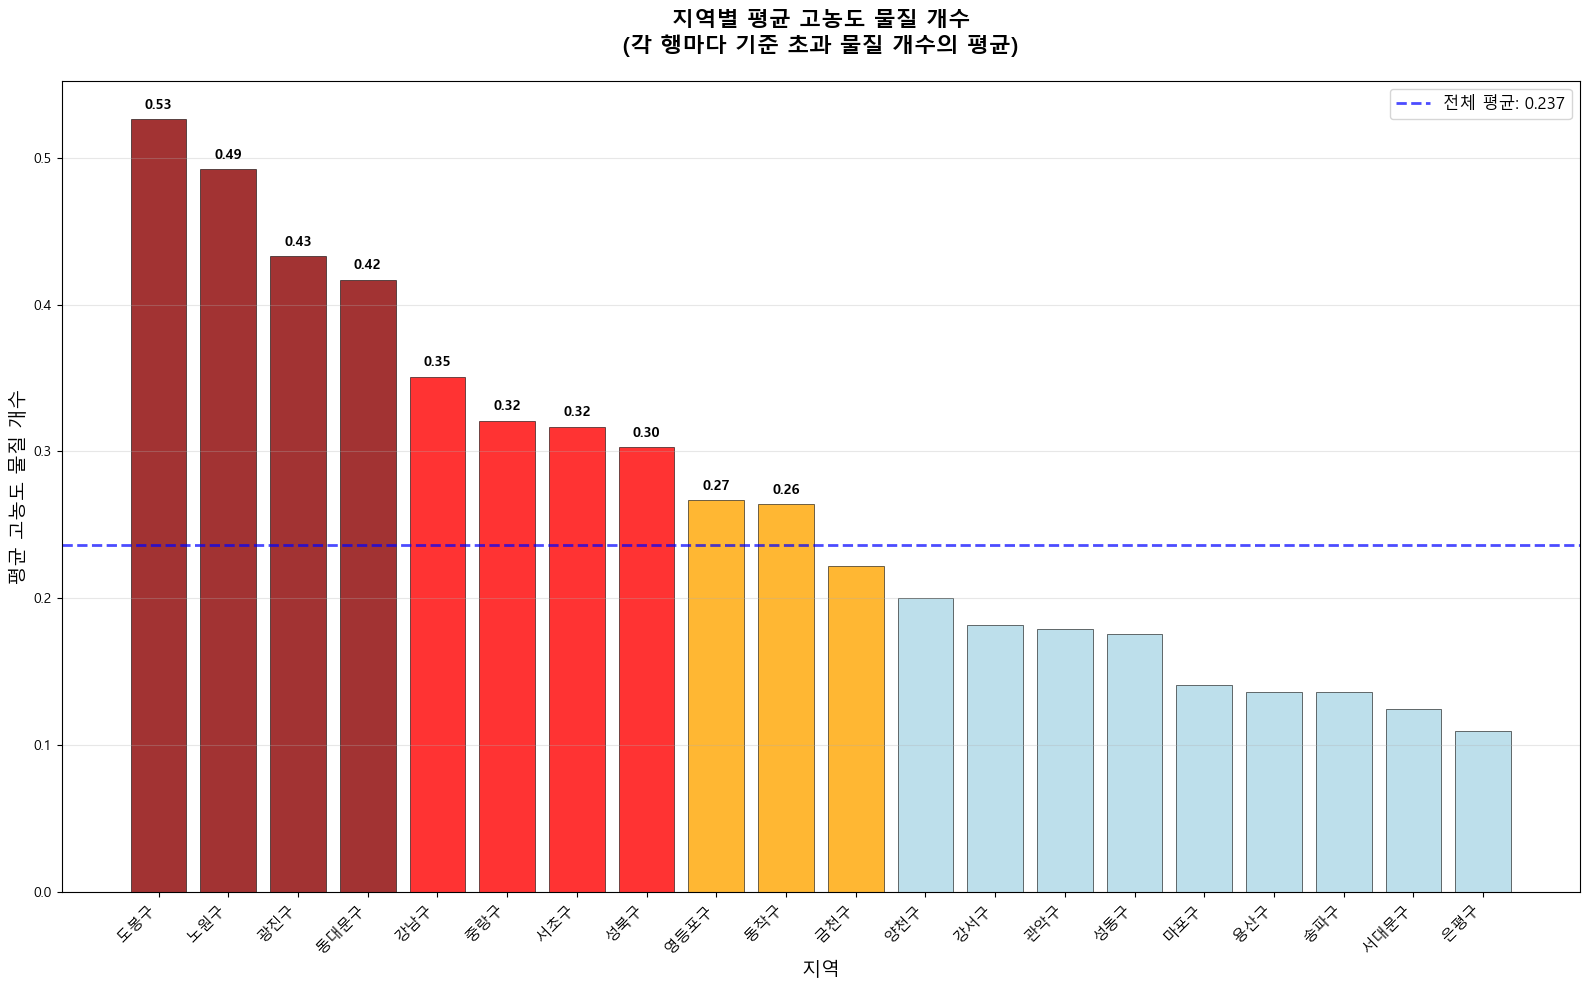

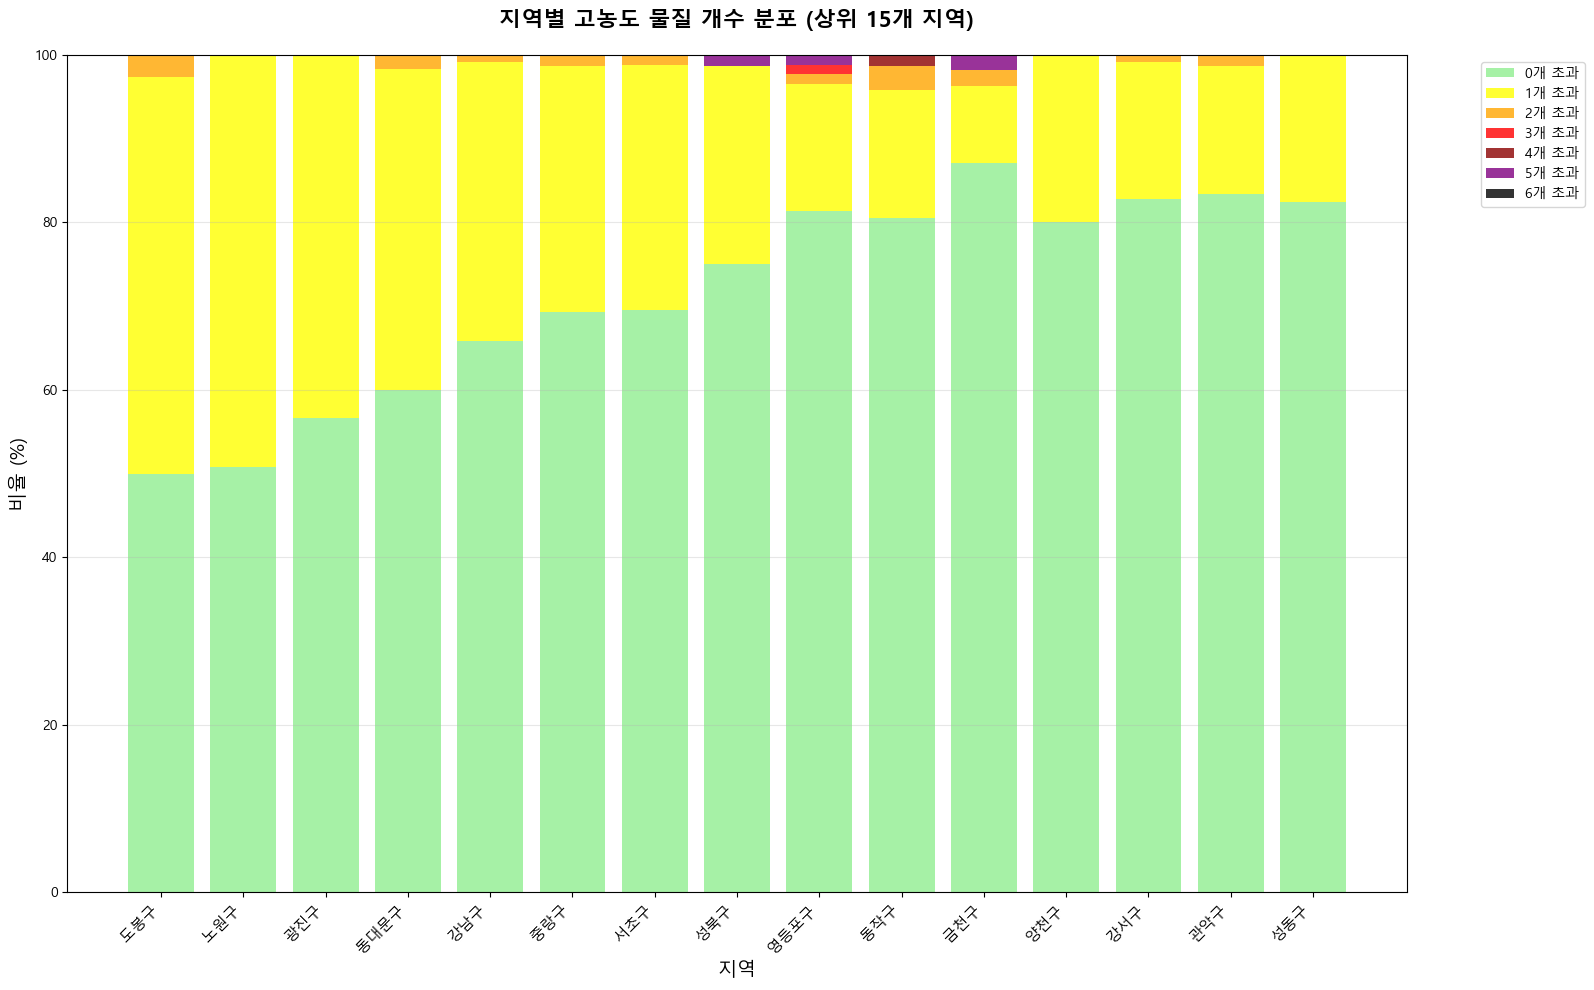


=== Îã§Ï§ë Ïò§Ïóº(2Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥º) ÎπÑÏú® ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠ ===
10. ÎèôÏûëÍµ¨: 4.2% (3/72)
9. Í∏àÏ≤úÍµ¨: 3.7% (2/54)
8. ÏòÅÎì±Ìè¨Íµ¨: 3.5% (3/86)
7. ÎèÑÎ¥âÍµ¨: 2.6% (2/76)
6. ÏÜ°ÌååÍµ¨: 1.9% (3/154)
5. ÎèôÎåÄÎ¨∏Íµ¨: 1.7% (1/60)
4. ÏÑ±Î∂ÅÍµ¨: 1.3% (1/76)
3. Ï§ëÎûëÍµ¨: 1.3% (1/78)
2. Í¥ÄÏïÖÍµ¨: 1.3% (1/78)
1. ÏÑúÏ¥àÍµ¨: 1.2% (1/82)


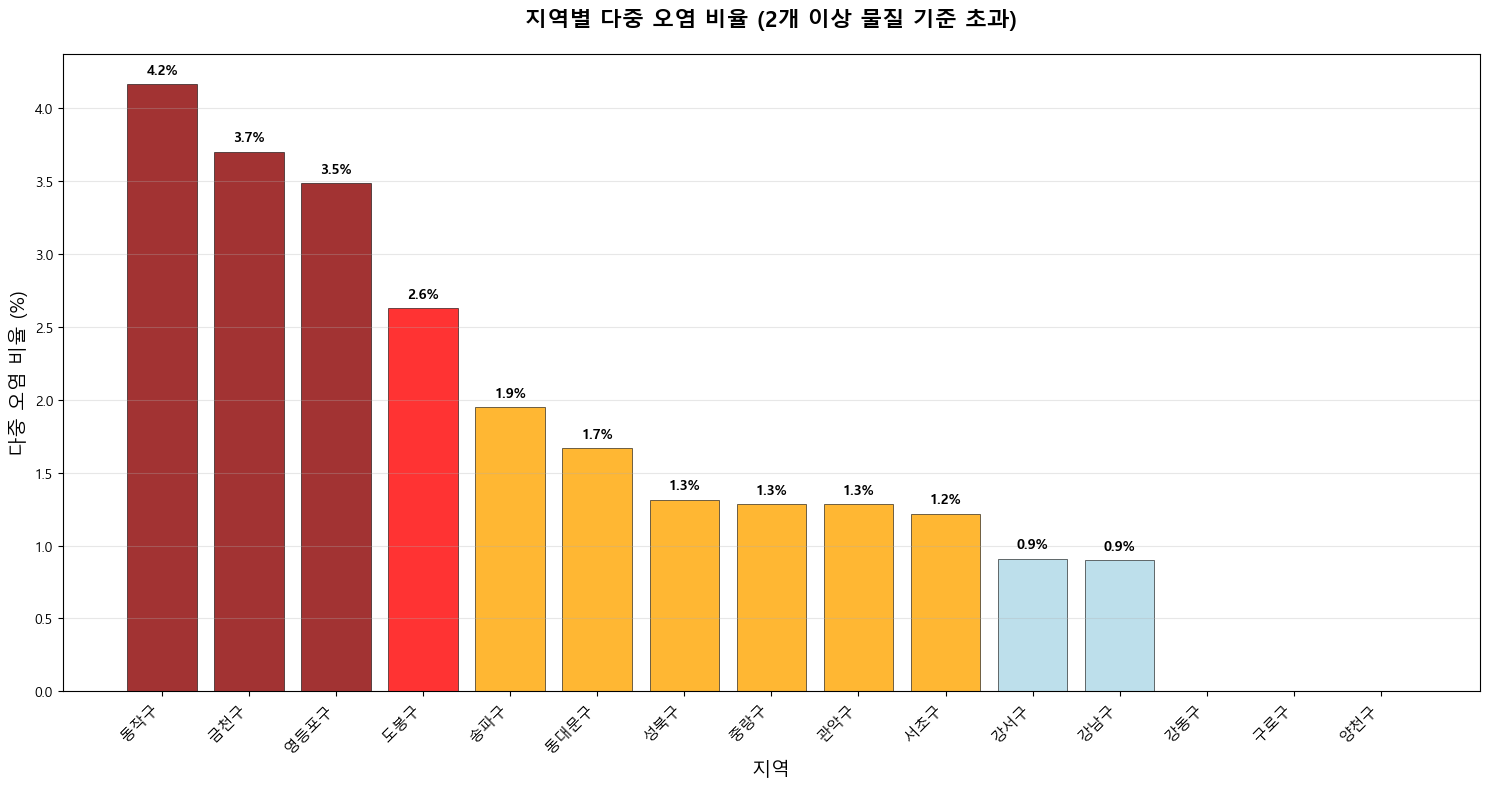

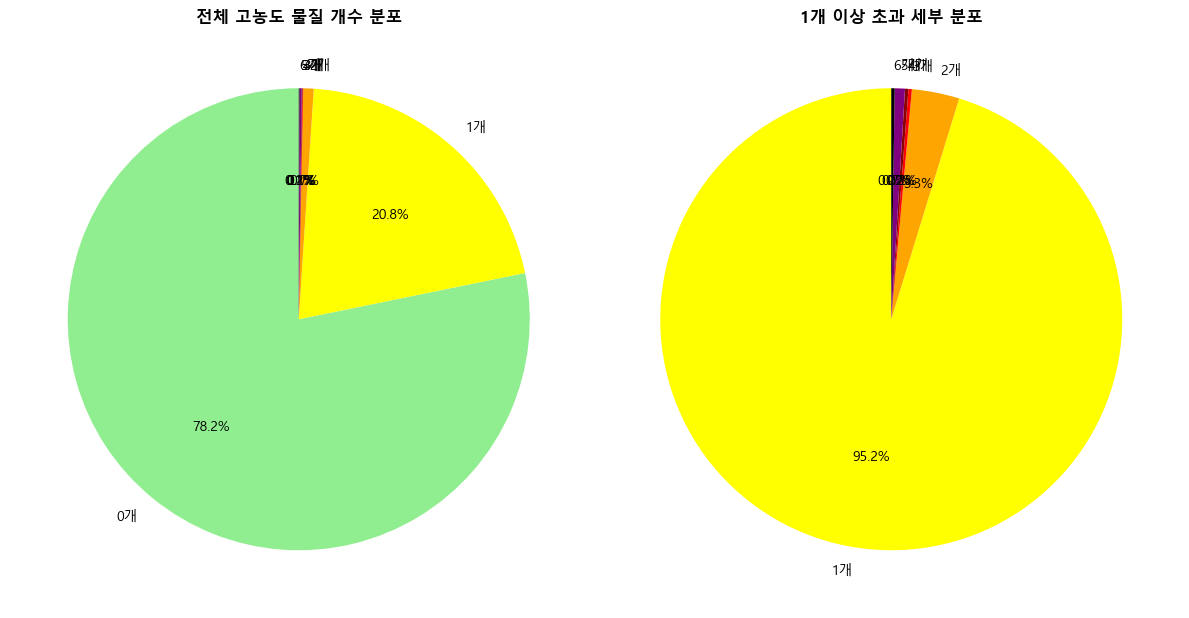

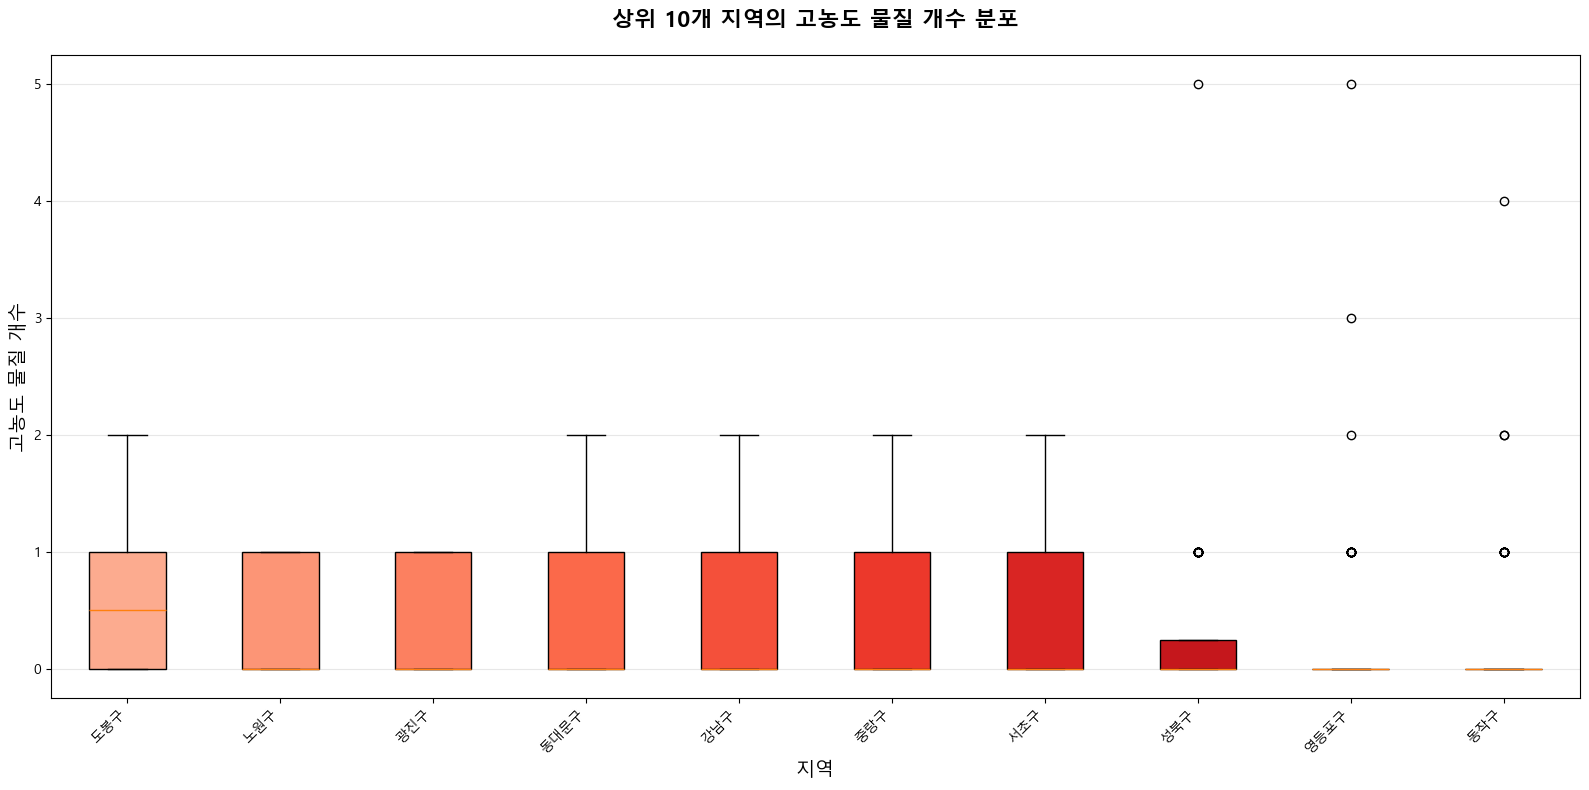


=== ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥º ===
üèÜ ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò 1ÏúÑ: ÎèÑÎ¥âÍµ¨ (0.526Í∞ú)
‚ö†Ô∏è  Îã§Ï§ë Ïò§Ïóº ÎπÑÏú® 1ÏúÑ: ÎèôÏûëÍµ¨ (4.2%)
üìä Ï†ÑÏ≤¥ ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò: 0.237Í∞ú
üéØ 1Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥º ÎπÑÏú®: 21.8%
üö® 2Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥º ÎπÑÏú®: 1.0%

=== ÏúÑÌóòÎèÑ Îì±Í∏âÎ≥Ñ ÏßÄÏó≠ Î∂ÑÎ•ò ===
Í≥†ÏúÑÌóòÍµ∞ (ÌèâÍ∑† 0.4Í∞ú Ï¥àÍ≥º): ÎèÑÎ¥âÍµ¨, ÎÖ∏ÏõêÍµ¨, Í¥ëÏßÑÍµ¨, ÎèôÎåÄÎ¨∏Íµ¨
Ï§ëÏúÑÌóòÍµ∞ (ÌèâÍ∑† 0.2-0.4Í∞ú): Í∞ïÎÇ®Íµ¨, Ï§ëÎûëÍµ¨, ÏÑúÏ¥àÍµ¨, ÏÑ±Î∂ÅÍµ¨, ÏòÅÎì±Ìè¨Íµ¨, ÎèôÏûëÍµ¨, Í∏àÏ≤úÍµ¨
Ï†ÄÏúÑÌóòÍµ∞ (ÌèâÍ∑† 0.2Í∞ú Ïù¥Ìïò): ÏñëÏ≤úÍµ¨, Í∞ïÏÑúÍµ¨, Í¥ÄÏïÖÍµ¨, ÏÑ±ÎèôÍµ¨, ÎßàÌè¨Íµ¨, Ïö©ÏÇ∞Íµ¨, ÏÜ°ÌååÍµ¨, ÏÑúÎåÄÎ¨∏Íµ¨, ÏùÄÌèâÍµ¨, Íµ¨Î°úÍµ¨, Í∞ïÎ∂ÅÍµ¨, Ï§ëÍµ¨, Í∞ïÎèôÍµ¨, Ï¢ÖÎ°úÍµ¨


In [ ]:
# Í≥†ÎÜçÎèÑ Ïò§Ïóº Í∏∞Ï§Ä Ï†ïÏùò
high_pollution_criteria = {
    'AIR_BACT': 800,
    'FALL_BACT': 10,
    'MITE': 100,
    'RN': 148,
    'O3': 0.06,
    'ASBESTOS': 0.01
}

print("=== Í≥†ÎÜçÎèÑ Ïò§Ïóº Í∏∞Ï§Ä ===")
for substance, threshold in high_pollution_criteria.items():
    print(f"{substance}: >= {threshold}")

# ÏßÄÏó≠Î™Ö Îã®Ï∂ï
df['ÏßÄÏó≠'] = df['ADRCD_NM'].str.replace('ÏÑúÏö∏ÌäπÎ≥ÑÏãú ', '')

# Í∞Å ÌñâÎßàÎã§ Í≥†ÎÜçÎèÑ Í∏∞Ï§ÄÏóê Ìï¥ÎãπÌïòÎäî Î¨ºÏßà Í∞úÏàò Í≥ÑÏÇ∞
def count_high_pollution_substances(row):
    count = 0
    exceeding_substances = []
    
    for substance, threshold in high_pollution_criteria.items():
        if pd.notna(row[substance]) and row[substance] >= threshold:
            count += 1
            exceeding_substances.append(substance)
    
    return count, exceeding_substances

# Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò Í≥ÑÏÇ∞
pollution_counts = df.apply(lambda row: count_high_pollution_substances(row), axis=1)
df['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò'] = [x[0] for x in pollution_counts]
df['Ï¥àÍ≥º_Î¨ºÏßà_Î¶¨Ïä§Ìä∏'] = [x[1] for x in pollution_counts]

print(f"\n=== Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌòÑÌô© ===")
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")

# Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàòÎ≥Ñ Î∂ÑÌè¨
count_distribution = df['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò'].value_counts().sort_index()
print(f"\n=== Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàòÎ≥Ñ Î∂ÑÌè¨ ===")
for count, frequency in count_distribution.items():
    percentage = (frequency / len(df)) * 100
    print(f"{count}Í∞ú Î¨ºÏßà Ï¥àÍ≥º: {frequency}Í±¥ ({percentage:.1f}%)")

# ÏßÄÏó≠Î≥Ñ Î∂ÑÏÑù
regional_analysis = df.groupby('ÏßÄÏó≠').agg({
    'Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò': ['count', 'sum', 'mean', 'std'],
    'SCHUL_NM': 'count'
}).round(3)

regional_analysis.columns = ['Ï¥ù_Îç∞Ïù¥ÌÑ∞Ïàò', 'Ï¥ù_Ï¥àÍ≥ºÍ±¥Ïàò', 'ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò', 'ÌëúÏ§ÄÌé∏Ï∞®', 'ÌïôÍµêÏàò']
regional_analysis['Ï¥àÍ≥º_ÎπÑÏú®'] = (regional_analysis['Ï¥ù_Ï¥àÍ≥ºÍ±¥Ïàò'] / regional_analysis['Ï¥ù_Îç∞Ïù¥ÌÑ∞Ïàò'] * 100).round(1)

# ÌèâÍ∑† Ï¥àÍ≥º Í∞úÏàòÎ°ú Ï†ïÎ†¨
regional_analysis_sorted = regional_analysis.sort_values('ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò', ascending=False)

print(f"\n=== ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò (ÏÉÅÏúÑ 15Í∞ú) ===")
for i, (region, data) in enumerate(regional_analysis_sorted.head(15).iterrows(), 1):
    print(f"{i:2d}. {region}: ÌèâÍ∑† {data['ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò']:.2f}Í∞ú (Ï¥ù {int(data['Ï¥ù_Ï¥àÍ≥ºÍ±¥Ïàò'])}/{int(data['Ï¥ù_Îç∞Ïù¥ÌÑ∞Ïàò'])})")

# 1. ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(16, 10))
top_regions = regional_analysis_sorted.head(20)

bars = plt.bar(range(len(top_regions)), top_regions['ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò'], 
               color=['darkred' if x > 0.4 else 'red' if x > 0.3 else 'orange' if x > 0.2 else 'lightblue' 
                      for x in top_regions['ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò']],
               alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò\n(Í∞Å ÌñâÎßàÎã§ Í∏∞Ï§Ä Ï¥àÍ≥º Î¨ºÏßà Í∞úÏàòÏùò ÌèâÍ∑†)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ÏßÄÏó≠', fontsize=14)
plt.ylabel('ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò', fontsize=14)
plt.xticks(range(len(top_regions)), top_regions.index, rotation=45, ha='right', fontsize=11)

# ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠Ïóê Í∞í ÌëúÏãú
for i in range(min(10, len(bars))):
    height = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2., height + 0.005,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Ï†ÑÏ≤¥ ÌèâÍ∑†ÏÑ† Ï∂îÍ∞Ä
overall_avg = df['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò'].mean()
plt.axhline(y=overall_avg, color='blue', linestyle='--', alpha=0.7, linewidth=2,
            label=f'Ï†ÑÏ≤¥ ÌèâÍ∑†: {overall_avg:.3f}')

plt.legend(fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò Î∂ÑÌè¨ Ïä§ÌÉù Î∞î Ï∞®Ìä∏
# ÏÉÅÏúÑ 15Í∞ú ÏßÄÏó≠Ïùò 0~6Í∞ú Î∂ÑÌè¨
top_15_regions = regional_analysis_sorted.head(15).index

region_count_matrix = pd.DataFrame(index=top_15_regions, columns=range(7))
for region in top_15_regions:
    region_data = df[df['ÏßÄÏó≠'] == region]['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò'].value_counts()
    for count in range(7):
        region_count_matrix.loc[region, count] = region_data.get(count, 0)

# ÎπÑÏú®Î°ú Î≥ÄÌôò
region_count_ratio = region_count_matrix.div(region_count_matrix.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 10))
colors = ['lightgreen', 'yellow', 'orange', 'red', 'darkred', 'purple', 'black']
bottom = np.zeros(len(top_15_regions))

for count in range(7):
    plt.bar(range(len(top_15_regions)), region_count_ratio[count], 
            bottom=bottom, label=f'{count}Í∞ú Ï¥àÍ≥º', color=colors[count], alpha=0.8)
    bottom += region_count_ratio[count]

plt.title('ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò Î∂ÑÌè¨ (ÏÉÅÏúÑ 15Í∞ú ÏßÄÏó≠)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ÏßÄÏó≠', fontsize=14)
plt.ylabel('ÎπÑÏú® (%)', fontsize=14)
plt.xticks(range(len(top_15_regions)), top_15_regions, rotation=45, ha='right', fontsize=11)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Îã§Ï§ë Ïò§Ïóº (2Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥º) Î∂ÑÏÑù
multi_pollution_analysis = []
for region in df['ÏßÄÏó≠'].unique():
    region_data = df[df['ÏßÄÏó≠'] == region]
    total_count = len(region_data)
    multi_count = len(region_data[region_data['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò'] >= 2])
    multi_ratio = (multi_count / total_count) * 100 if total_count > 0 else 0
    
    multi_pollution_analysis.append({
        'ÏßÄÏó≠': region,
        'Ï†ÑÏ≤¥_Îç∞Ïù¥ÌÑ∞Ïàò': total_count,
        'Îã§Ï§ëÏò§Ïóº_Í±¥Ïàò': multi_count,
        'Îã§Ï§ëÏò§Ïóº_ÎπÑÏú®': multi_ratio
    })

multi_pollution_df = pd.DataFrame(multi_pollution_analysis)
multi_pollution_df = multi_pollution_df.sort_values('Îã§Ï§ëÏò§Ïóº_ÎπÑÏú®', ascending=False)

print(f"\n=== Îã§Ï§ë Ïò§Ïóº(2Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥º) ÎπÑÏú® ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠ ===")
for i, row in multi_pollution_df.head(10).iterrows():
    print(f"{len(multi_pollution_df.head(10)) - list(multi_pollution_df.head(10).index).index(i)}. {row['ÏßÄÏó≠']}: {row['Îã§Ï§ëÏò§Ïóº_ÎπÑÏú®']:.1f}% ({int(row['Îã§Ï§ëÏò§Ïóº_Í±¥Ïàò'])}/{int(row['Ï†ÑÏ≤¥_Îç∞Ïù¥ÌÑ∞Ïàò'])})")

# 4. Îã§Ï§ë Ïò§Ïóº ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(15, 8))
top_multi = multi_pollution_df.head(15)

bars = plt.bar(range(len(top_multi)), top_multi['Îã§Ï§ëÏò§Ïóº_ÎπÑÏú®'],
               color=['darkred' if x > 3 else 'red' if x > 2 else 'orange' if x > 1 else 'lightblue'
                      for x in top_multi['Îã§Ï§ëÏò§Ïóº_ÎπÑÏú®']],
               alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('ÏßÄÏó≠Î≥Ñ Îã§Ï§ë Ïò§Ïóº ÎπÑÏú® (2Í∞ú Ïù¥ÏÉÅ Î¨ºÏßà Í∏∞Ï§Ä Ï¥àÍ≥º)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ÏßÄÏó≠', fontsize=14)
plt.ylabel('Îã§Ï§ë Ïò§Ïóº ÎπÑÏú® (%)', fontsize=14)
plt.xticks(range(len(top_multi)), top_multi['ÏßÄÏó≠'], rotation=45, ha='right', fontsize=11)

# Í∞í ÌëúÏãú
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Ï†ÑÏ≤¥ Î∂ÑÌè¨ ÌååÏù¥Ï∞®Ìä∏
plt.figure(figsize=(12, 8))

# ÏôºÏ™Ω: Ï†ÑÏ≤¥ Î∂ÑÌè¨
plt.subplot(1, 2, 1)
count_dist = df['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò'].value_counts().sort_index()
colors_pie = ['lightgreen', 'yellow', 'orange', 'red', 'darkred', 'purple', 'black']
plt.pie(count_dist.values, labels=[f'{i}Í∞ú' for i in count_dist.index], 
        autopct='%1.1f%%', colors=colors_pie[:len(count_dist)], startangle=90)
plt.title('Ï†ÑÏ≤¥ Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò Î∂ÑÌè¨', fontweight='bold')

# Ïò§Î•∏Ï™Ω: 1Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥ºÏùò ÏÑ∏Î∂Ä Î∂ÑÌè¨
plt.subplot(1, 2, 2)
exceeding_data = count_dist[count_dist.index >= 1]
if len(exceeding_data) > 0:
    plt.pie(exceeding_data.values, labels=[f'{i}Í∞ú' for i in exceeding_data.index],
            autopct='%1.1f%%', colors=colors_pie[1:len(exceeding_data)+1], startangle=90)
    plt.title('1Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥º ÏÑ∏Î∂Ä Î∂ÑÌè¨', fontweight='bold')

plt.tight_layout()
plt.show()

# 7. Î∞ïÏä§ÌîåÎ°Ø: ÏÉÅÏúÑ ÏßÄÏó≠Î≥Ñ Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò Î∂ÑÌè¨
plt.figure(figsize=(16, 8))
top_10_regions = regional_analysis_sorted.head(10).index
plot_data = []
plot_labels = []

for region in top_10_regions:
    region_counts = df[df['ÏßÄÏó≠'] == region]['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò']
    plot_data.append(region_counts)
    plot_labels.append(region)

box_plot = plt.boxplot(plot_data, labels=plot_labels, patch_artist=True)
colors_box = plt.cm.Reds(np.linspace(0.3, 0.9, len(box_plot['boxes'])))
for patch, color in zip(box_plot['boxes'], colors_box):
    patch.set_facecolor(color)

plt.title('ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠Ïùò Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò Î∂ÑÌè¨', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ÏßÄÏó≠', fontsize=14)
plt.ylabel('Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ÏµúÏ¢Ö ÏöîÏïΩ
print(f"\n=== ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥º ===")
print(f"üèÜ ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò 1ÏúÑ: {regional_analysis_sorted.index[0]} ({regional_analysis_sorted.iloc[0]['ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò']:.3f}Í∞ú)")
print(f"‚ö†Ô∏è  Îã§Ï§ë Ïò§Ïóº ÎπÑÏú® 1ÏúÑ: {multi_pollution_df.iloc[0]['ÏßÄÏó≠']} ({multi_pollution_df.iloc[0]['Îã§Ï§ëÏò§Ïóº_ÎπÑÏú®']:.1f}%)")
print(f"üìä Ï†ÑÏ≤¥ ÌèâÍ∑† Í≥†ÎÜçÎèÑ Î¨ºÏßà Í∞úÏàò: {overall_avg:.3f}Í∞ú")
print(f"üéØ 1Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥º ÎπÑÏú®: {(len(df[df['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò'] >= 1]) / len(df) * 100):.1f}%")
print(f"üö® 2Í∞ú Ïù¥ÏÉÅ Ï¥àÍ≥º ÎπÑÏú®: {(len(df[df['Í≥†ÎÜçÎèÑ_Î¨ºÏßà_Í∞úÏàò'] >= 2]) / len(df) * 100):.1f}%")

# ÏúÑÌóòÎèÑ Îì±Í∏âÎ≥Ñ ÏßÄÏó≠ Î∂ÑÎ•ò
print(f"\n=== ÏúÑÌóòÎèÑ Îì±Í∏âÎ≥Ñ ÏßÄÏó≠ Î∂ÑÎ•ò ===")
high_risk = regional_analysis_sorted[regional_analysis_sorted['ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò'] > 0.4].index.tolist()
medium_risk = regional_analysis_sorted[(regional_analysis_sorted['ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò'] > 0.2) & 
                                       (regional_analysis_sorted['ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò'] <= 0.4)].index.tolist()
low_risk = regional_analysis_sorted[regional_analysis_sorted['ÌèâÍ∑†_Ï¥àÍ≥ºÍ∞úÏàò'] <= 0.2].index.tolist()